- **Analysez les ventes d'une librairie**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
from datetime import datetime
import re

# Import des fichiers


In [2]:
customers = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%206/BDD/customers.csv', sep =';')
products = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%206/BDD/products.csv', sep =';')
transactions = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%206/BDD/Transactions.csv', sep =';')

In [7]:
#Nous cherchons à créer une fonction qui nous permet de rapidement voir les : uniques, nan, le count, la fréquence, le min, le max, la moyenne, le nombre de ligne et de colonnes et le type

def describe_df(df):
    
    description=pd.DataFrame()
    description['dtype'] = df.dtypes
    description['missing_values'] = df.isnull().sum()
    description['unique_values'] = df.nunique()
    description['count']=df.count()
    description['min']=df.select_dtypes(include='number').min()
    description['max']=df.select_dtypes(include='number').max()
    description['moy']=round(df.select_dtypes(include='number').mean(),2)
    description['q1']=df.select_dtypes(include='number').quantile(0.25)
    description['med']=df.select_dtypes(include='number').quantile(0.5)
    description['q3']=df.select_dtypes(include='number').quantile(0.75)
    nb_nan=df.isnull().sum().sum()

    print('Notre jeu de données comporte ' + str(df.shape[0]) + ' lignes'+ ' et ' +str(df.shape[1]) + ' colonnes')
    print('Il y a ' + str(df.duplicated().sum()) + ' doublons')
    print('Il y a ' + str(nb_nan) + ' valeurs nulles soit ' + str(round(nb_nan/(df.shape[0]*df.shape[1])*100,2)) + ' %')
    
    display(description)
    
    if df.duplicated().sum() >0:
        print('les lignes en doubles sont :')
        display(df.loc[df.duplicated()==True].head())
    display(df.head())

# Inspection des fichiers

Nous allons inspecter chacun des fichiers pour comprendre un peu mieux les données en vérifiant les différents type des colonnes, la taille de notre jeu de données, la présence de doublons ou encore de null

## Customers

In [8]:
describe_df(customers)

Notre jeu de données comporte 8621 lignes et 4 colonnes
Il y a 0 doublons
Il y a 0 valeurs nulles soit 0.0 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
client_id,object,0,8621,8621,NaN,NaN,NaN,NaN,NaN,NaN
sex,object,0,2,8621,NaN,NaN,NaN,NaN,NaN,NaN
birth,int64,0,76,8621,1929.0,2004.0,1978.28,1966.0,1979.0,1992.0
age,int64,0,76,8621,20.0,95.0,45.72,32.0,45.0,58.0


,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81


Le fichier customers ne comprend ni doublons, ni valeurs null

Nous allons mettre l'âge des clients à l'aide de l'année de naissance pour pouvoir plus tard utiliser différentes tranches d'âge

In [9]:
customers['age']=datetime.now().year-customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81


Nous allons vérifier si dans l'âge nous avons des valeurs aberrantes

L'âge semble cohérent, vérifions maintenant les valeurs présentes dans la colonne 'sex'

In [10]:
customers['sex'].unique()

array(['f', 'm'], dtype=object)

In [11]:
customers['client_id'].unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

In [12]:
# Regarder si les valeurs de cette colonne suivent le même format
customers.loc[customers['client_id'].str.contains('c_\\d')]
#Les colonnes semblent avoir toutes le même format

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81
...,...,...,...,...
8616,c_7920,m,1956,68
8617,c_7403,f,1970,54
8618,c_5119,m,1974,50
8619,c_5643,f,1968,56


In [13]:
customers.loc[customers['client_id']=='c_1']

,client_id,sex,birth,age
4298,c_1,m,1955,69


On peut conclure que ce jeu de données semble cohérent

## Products


In [16]:
describe_df(products)

Notre jeu de données comporte 3286 lignes et 3 colonnes
Il y a 0 doublons
Il y a 0 valeurs nulles soit 0.0 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
id_prod,object,0,3286,3286,NaN,NaN,NaN,NaN,NaN,NaN
price,float64,0,1454,3286,0.62,300.0,21.86,6.99,13.075,22.99
categ,int64,0,3,3286,0.00,2.0,0.37,0.00,0.000,1.00


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [17]:
# Regarder si les valeurs de cette colonne suivent le même format
products.loc[products['id_prod'].str.contains('\\d_\\d')]

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


On remarque que des prix sont inférieurs à 1 euros. Nous cherchons à savoir combien il y en a. 

In [18]:
products.loc[products['price']<=1].count()

id_prod    29
price      29
categ      29
dtype: int64

In [94]:
products.loc[products['price']<=1]

,id_prod,price,categ
145,0_1203,0.99,0
370,0_120,0.66,0
686,0_2138,0.93,0
800,0_2166,0.97,0
847,0_180,0.97,0
945,0_2169,0.99,0
984,0_2275,0.99,0
990,0_1329,0.99,0
1210,0_1844,0.77,0
1529,0_1620,0.80,0


29 produits ont un prix d'1 euros ou moins. nous choisissons de les garder en supposant qu'il peut s'agir d'articles de papéterie ou de feuillets de livres

In [95]:
products['categ'].unique()

array([0, 1, 2], dtype=int64)

Le fichier product ne comprend ni doublons, ni valeurs null et semble cohérent

## Transactions

In [19]:
describe_df(transactions)

Notre jeu de données comporte 687534 lignes et 4 colonnes
Il y a 0 doublons
Il y a 0 valeurs nulles soit 0.0 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
id_prod,object,0,3265,687534,NaN,NaN,NaN,NaN,NaN,NaN
date,object,0,687419,687534,NaN,NaN,NaN,NaN,NaN,NaN
session_id,object,0,345505,687534,NaN,NaN,NaN,NaN,NaN,NaN
client_id,object,0,8600,687534,NaN,NaN,NaN,NaN,NaN,NaN


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


Nous vérifions que le format id_prod et id_client correspondent au même format que celui du tableau des produits

In [20]:
transactions.loc[-transactions['id_prod'].str.contains('\\d_\\d')].shape

(0, 4)

In [21]:
transactions.loc[-transactions['client_id'].str.contains('c_\\d')].shape

(0, 4)

Nous n'avons pas d'erreur de format sur ces éléments

Le fichier transaction ne comprend pas de valeurs nulles. Nous allons transformer la colonne date qui est sous format object en format date. Nous vérifierons avec une prochaine jointure si id_prod et client_id correspondent aux autres tables

### Gestion de la date

la date actuelle est sous format yyyy-MM-dd HH:mm:ss.SSSSSS. Nous allons d'abord séparer les différentes composantes pour identifier les erreurs, les traiter puis réassembler à nouveau les colonnes

#### Séparation des colonnes

In [22]:
transactions[['y-m-d', 'h-m-s.ms']]=transactions['date'].str.split(expand=True)
transactions[['h', 'min','s.ms']]=transactions['h-m-s.ms'].str.split(':',expand=True)
transactions[['s','ms']]=transactions['s.ms'].str.split('.',expand=True)
transactions.head()

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01,00:01:07.843138,00,01,07.843138,07,843138
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03-01,00:02:26.047414,00,02,26.047414,26,047414
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03-01,00:02:38.311413,00,02,38.311413,38,311413
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03-01,00:04:54.559692,00,04,54.559692,54,559692
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03-01,00:05:18.801198,00,05,18.801198,18,801198


#### identification des heures dans h, min, s et ms

Nous vérifions d'abord les heures

In [105]:
transactions.loc[(transactions['h']<'00') | (transactions['h']>'23')]

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms
198325,1_400,2021-10-02 24:04:58.422464,s_107311,c_2513,2021-10-02,24:04:58.422464,24,04,58.422464,58,422464
198326,1_601,2021-10-02 24:04:59.254020,s_107311,c_2513,2021-10-02,24:04:59.254020,24,04,59.254020,59,254020
198327,1_735,2021-10-02 24:04:59.422464,s_107311,c_2513,2021-10-02,24:04:59.422464,24,04,59.422464,59,422464
198328,1_351,2021-10-02 24:04:59.913108,s_107311,c_2513,2021-10-02,24:04:59.913108,24,04,59.913108,59,913108
198329,1_400,2021-10-02 24:06:02.588166,s_107205,c_5036,2021-10-02,24:06:02.588166,24,06,02.588166,02,588166
...,...,...,...,...,...,...,...,...,...,...,...
221108,1_445,2021-10-26 24:36:01.240212,s_105041,c_3949,2021-10-26,24:36:01.240212,24,36,01.240212,01,240212
221109,1_296,2021-10-26 24:36:21.240212,s_105041,c_3949,2021-10-26,24:36:21.240212,24,36,21.240212,21,240212
221820,1_45,2021-10-27 24:18:21.505552,s_98882,c_7656,2021-10-27,24:18:21.505552,24,18,21.505552,21,505552
221821,1_431,2021-10-27 24:20:46.744883,s_99594,c_8073,2021-10-27,24:20:46.744883,24,20,46.744883,46,744883


In [106]:
transactions.loc[transactions['h']=='24']

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms
198325,1_400,2021-10-02 24:04:58.422464,s_107311,c_2513,2021-10-02,24:04:58.422464,24,04,58.422464,58,422464
198326,1_601,2021-10-02 24:04:59.254020,s_107311,c_2513,2021-10-02,24:04:59.254020,24,04,59.254020,59,254020
198327,1_735,2021-10-02 24:04:59.422464,s_107311,c_2513,2021-10-02,24:04:59.422464,24,04,59.422464,59,422464
198328,1_351,2021-10-02 24:04:59.913108,s_107311,c_2513,2021-10-02,24:04:59.913108,24,04,59.913108,59,913108
198329,1_400,2021-10-02 24:06:02.588166,s_107205,c_5036,2021-10-02,24:06:02.588166,24,06,02.588166,02,588166
...,...,...,...,...,...,...,...,...,...,...,...
221108,1_445,2021-10-26 24:36:01.240212,s_105041,c_3949,2021-10-26,24:36:01.240212,24,36,01.240212,01,240212
221109,1_296,2021-10-26 24:36:21.240212,s_105041,c_3949,2021-10-26,24:36:21.240212,24,36,21.240212,21,240212
221820,1_45,2021-10-27 24:18:21.505552,s_98882,c_7656,2021-10-27,24:18:21.505552,24,18,21.505552,21,505552
221821,1_431,2021-10-27 24:20:46.744883,s_99594,c_8073,2021-10-27,24:20:46.744883,24,20,46.744883,46,744883


236 valeurs ont comme heure 24, nous les remplaçons par 00

In [107]:
transactions['h'].loc[transactions['h']=='24']='00'

Nous vérifions les minutes. Aucun soucis identifié

In [108]:
transactions.loc[(transactions['min']<'00') | (transactions['min']>'59')]

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms


Nous vérifions les minutes. Aucun soucis identifié

Nous vérifions les secondes. Certaines secondes sont en int alors que d'autres en str. Nous mettons tous au format int

In [109]:
transactions['s']=transactions['s'].astype('int')

In [110]:
transactions.loc[(transactions['s']<0) | (transactions['s']>59)]

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms


In [111]:
transactions['s']=transactions['s'].astype(str)

Nous vérifions les millisecondes. Celles-ci doivent être comprise entre 000000 et 999999. Avant cela, nous allons les transformer en int . Aucun pb n'est détecté.

In [112]:
transactions['ms']=transactions['ms'].astype(str)

In [113]:
transactions.loc[(transactions['ms']<'0') | (transactions['s']>'999999')]

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms


#### Réassemblage des colonnes

Tout d'abord, réassemblage des colonnes s et ms, puis avec h et min et enfin avec y-m-d

In [114]:
transactions.head()

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01,00:01:07.843138,00,01,07.843138,7,843138
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03-01,00:02:26.047414,00,02,26.047414,26,047414
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03-01,00:02:38.311413,00,02,38.311413,38,311413
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03-01,00:04:54.559692,00,04,54.559692,54,559692
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03-01,00:05:18.801198,00,05,18.801198,18,801198


In [115]:
transactions['s.ms2'] = transactions[['s', 'ms']].agg(".".join, axis=1)
transactions['h-m-s.ms2'] = transactions[['h','min', 's.ms2']].agg(":".join, axis=1)
transactions['date2'] = transactions[['y-m-d', 'h-m-s.ms2']].agg(" ".join, axis=1)

In [116]:
transactions.loc[transactions['ms']=='00']

,id_prod,date,session_id,client_id,y-m-d,h-m-s.ms,h,min,s.ms,s,ms,s.ms2,h-m-s.ms2,date2


In [117]:
transactions['date2']=pd.to_datetime(transactions['date2'], yearfirst=True)

In [118]:
transactions.dtypes

id_prod               object
date                  object
session_id            object
client_id             object
y-m-d                 object
h-m-s.ms              object
h                     object
min                   object
s.ms                  object
s                     object
ms                    object
s.ms2                 object
h-m-s.ms2             object
date2         datetime64[ns]
dtype: object

In [119]:
transactions.drop(columns =['date', 'y-m-d', 'h-m-s.ms', 'h', 'min', 's.ms', 's', 'ms', 's.ms2', 'h-m-s.ms2'], inplace=True)
transactions.rename(columns={'date2': 'date'}, inplace=True)

In [120]:
transactions.head()

,id_prod,session_id,client_id,date
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138
1,0_1390,s_2,c_664,2021-03-01 00:02:26.047414
2,0_1352,s_3,c_580,2021-03-01 00:02:38.311413
3,0_1458,s_4,c_7912,2021-03-01 00:04:54.559692
4,0_1358,s_5,c_2033,2021-03-01 00:05:18.801198


In [121]:
transactions.shape

(687534, 4)

# Jointure entre les différents fichiers

In [122]:
liaison1=transactions.merge(products, how='outer', on='id_prod', indicator=True)
joinF=liaison1.merge(customers, how='outer', on='client_id', indicator='merge2')
joinF.head()

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138,11.99,0.0,both,f,1967.0,56.0,both
1,0_1259,s_275943,c_329,2022-10-01 00:01:07.843138,11.99,0.0,both,f,1967.0,56.0,both
2,0_1259,s_305291,c_329,2022-12-01 00:01:07.843138,11.99,0.0,both,f,1967.0,56.0,both
3,0_1259,s_320153,c_329,2023-01-01 00:01:07.843138,11.99,0.0,both,f,1967.0,56.0,both
4,1_397,s_123998,c_329,2021-11-23 18:21:56.361813,18.99,1.0,both,f,1967.0,56.0,both


## Analyse des fichiers de jointures

Le premier fichier de jointure se nomme *liaison1*, le second *joinF*

### liaison1

In [123]:
liaison1.shape

(687555, 7)

In [124]:
liaison1['_merge'].unique()

['both', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [125]:
liaison1['_merge'].loc[(liaison1['_merge']=='right_only')].count()

21

In [126]:
liaison1.loc[(liaison1['_merge']=='right_only')]

,id_prod,session_id,client_id,date,price,categ,_merge
687534,0_1016,NaN,NaN,NaT,35.06,0,right_only
687535,0_1780,NaN,NaN,NaT,1.67,0,right_only
687536,0_1062,NaN,NaN,NaT,20.08,0,right_only
687537,0_1119,NaN,NaN,NaT,2.99,0,right_only
687538,0_1014,NaN,NaN,NaT,1.15,0,right_only
687539,1_0,NaN,NaN,NaT,31.82,1,right_only
687540,0_1318,NaN,NaN,NaT,20.92,0,right_only
687541,0_1800,NaN,NaN,NaT,22.05,0,right_only
687542,0_1645,NaN,NaN,NaT,2.99,0,right_only
687543,0_322,NaN,NaN,NaT,2.99,0,right_only


La taille du fichier liaison1 est plus élevée que celui des transactions. Nous avons **21 produits** qui n'ont pas de correspondance avec les id_prod de la table transactions. On peut penser qu'ils n'ont jamais été vendu. Si des questions du management viennent à ce sujet, il faudrait réaliser une étude plus poussée sur ces produits (positionnement prix notamment, référencement dans la bonne catégorie...)

### joinF

In [127]:
joinF.shape

(687576, 11)

In [128]:
joinF['merge2'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [129]:
joinF['merge2'].loc[(joinF['merge2']=='right_only')].count()

21

La taille du fichier joinF est plus élevée que celui des transactions. Nous avons **21 clients** qui n'apparaissent pas dans la table transactions. Comment peuven-ils être clients s'ils n'ont pas de transactions à leur actif ? Il est nécessaire de creuser avec l'équipe IT sur ces clients spécifiques pour les relier à d'autres id_clients déjà existants grâce à plus d'informations sur eux. 

In [130]:
#Regarder ce qu'il y a dans les transactions non référencé. produit vendu plusieurs fois mais pas suffisamment identifié dans la table produit
#Regarder aussi niveau client ce qui ne va pas

### liaisonF

Nous décidons de mettre de côté ces 42 lignes et nous choisissons de créer un nous df sans celles-ci. 

In [131]:
asupp=joinF.loc[(joinF['merge2']=='left_only') | (joinF['merge2']=='right_only')].index
liaisonF=joinF.drop(asupp)
liaisonF.shape

(687534, 11)

In [132]:
liaisonF.dtypes

id_prod               object
session_id            object
client_id             object
date          datetime64[ns]
price                float64
categ                float64
_merge              category
sex                   object
birth                float64
age                  float64
merge2              category
dtype: object

In [133]:
liaisonF['categ'].unique()

array([0., 1., 2.])

In [134]:
liaisonF['categ']=pd.to_numeric(liaisonF['categ'], downcast='integer')

In [135]:
liaisonF['categ']=liaisonF['categ'].astype('category')

In [136]:
liaisonF.duplicated('session_id').sum()

342029

In [137]:
pd.unique(liaisonF['id_prod']).shape

(3265,)

In [138]:
pd.unique(liaisonF['client_id']).shape

(8600,)

# Réponses demande Antoine

## CA Total de la vente en ligne

Calculons d'abors le CA total depuis la mise en place de la vente en ligne

In [139]:
print('Le CA total depuis la mise en place de la vente en ligne est de ' + str(round(sum(liaisonF['price']/1000000),2)) + " millions d'euros")

Le CA total depuis la mise en place de la vente en ligne est de 12.03 millions d'euros


## Evolution dans le temps de la vente en ligne

Nous allons réaliser une agrégation via groupby par jour, puis représenter graphiquement l'évolution du CA.  

In [140]:
evol_d_sum=liaisonF.groupby(pd.Grouper(key='date', freq='1D')).sum()

In [141]:
evol_d_sum['price']/=1000

In [142]:
evol_d_sum

,price,birth,age
date,,,
2021-03-01,16.56522,1902351.0,43775.0
2021-03-02,15.48645,1857005.0,42592.0
2021-03-03,15.19869,1801708.0,41245.0
2021-03-04,15.19607,1785123.0,41646.0
2021-03-05,17.47137,1865533.0,42156.0
...,...,...,...
2023-02-24,15.20789,1767989.0,40573.0
2023-02-25,15.76125,1790355.0,40460.0
2023-02-26,16.30472,1759258.0,41212.0


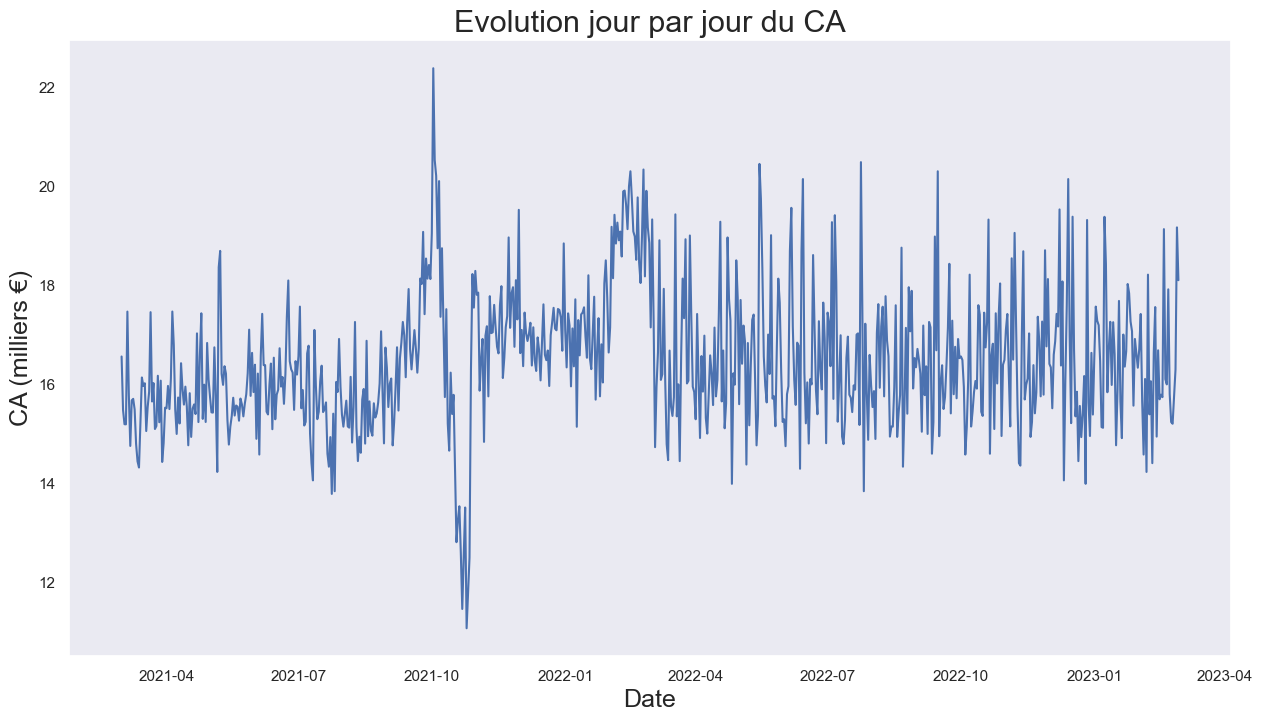

In [143]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.lineplot(data=evol_d_sum, x='date', y='price')
plt.ylabel('CA (milliers \u20ac)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.grid()
plt.title('Evolution jour par jour du CA', fontsize=22)

plt.show()


In [144]:
#mesurer l'impact de cette chute sur le jeu de données. Est-ce qu'on les garde pour analyser les données ? ou on décide de le supprimer / remplacer par la moyenne du mois, ou de le sortir et de l'étudier à part 

Nous remarquons une hausse et chute brutale au mois d'octobre 2021. Nous allons faire un zoom sur cette période

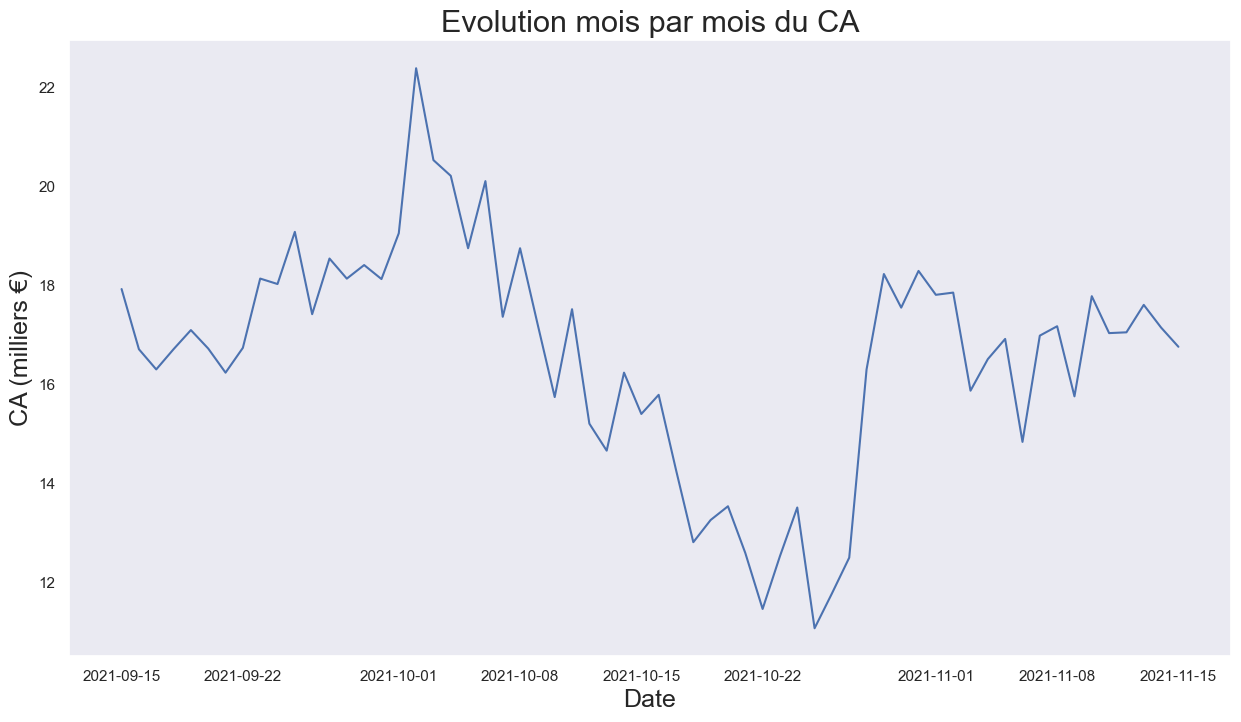

<Figure size 1500x800 with 0 Axes>

In [145]:
sns.lineplot(data=evol_d_sum.loc['2021-09-15':'2021-11-15'], x='date', y='price')
plt.ylabel('CA (milliers \u20ac)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.grid()
plt.title('Evolution mois par mois du CA', fontsize=22)
plt.figure(figsize = (15, 8))
plt.show()


## Décomposition en moyenne mobile pour évaluer la tendance globale

Pour calculer la moyenne mobile, nous utilisons une moyenne mobile sur 3 mois. Nous choisissons ensuite de superposer les graphs

In [146]:
evol_mois_sum=liaisonF.groupby(pd.Grouper(key='date', freq='1M')).sum()

In [469]:
evol_mois_sum.mean()

price    5.011526e+05
birth    5.665903e+07
age      1.294358e+06
dtype: float64

In [483]:
evol_mois_sum.describe()

,price,birth,age
count,24.000000,2.400000e+01,2.400000e+01
mean,501152.629167,5.665903e+07,1.294358e+06
std,18453.136332,3.712355e+06,9.074755e+04
min,456679.760000,4.893791e+07,1.107062e+06
25%,490729.742500,5.597374e+07,1.275848e+06
50%,501566.105000,5.653149e+07,1.293488e+06
75%,515634.330000,5.814863e+07,1.330840e+06
max,535571.500000,6.587317e+07,1.521053e+06


In [485]:
evol_mois_sum.head()

,price,birth,age
date,,,
2021-03-31,482440.61,56568240.0,1291583.0
2021-04-30,476109.30,56263669.0,1276520.0
2021-05-31,492943.47,55946722.0,1273833.0
2021-06-30,484088.56,53109429.0,1208121.0
2021-07-31,482835.40,48937912.0,1107062.0


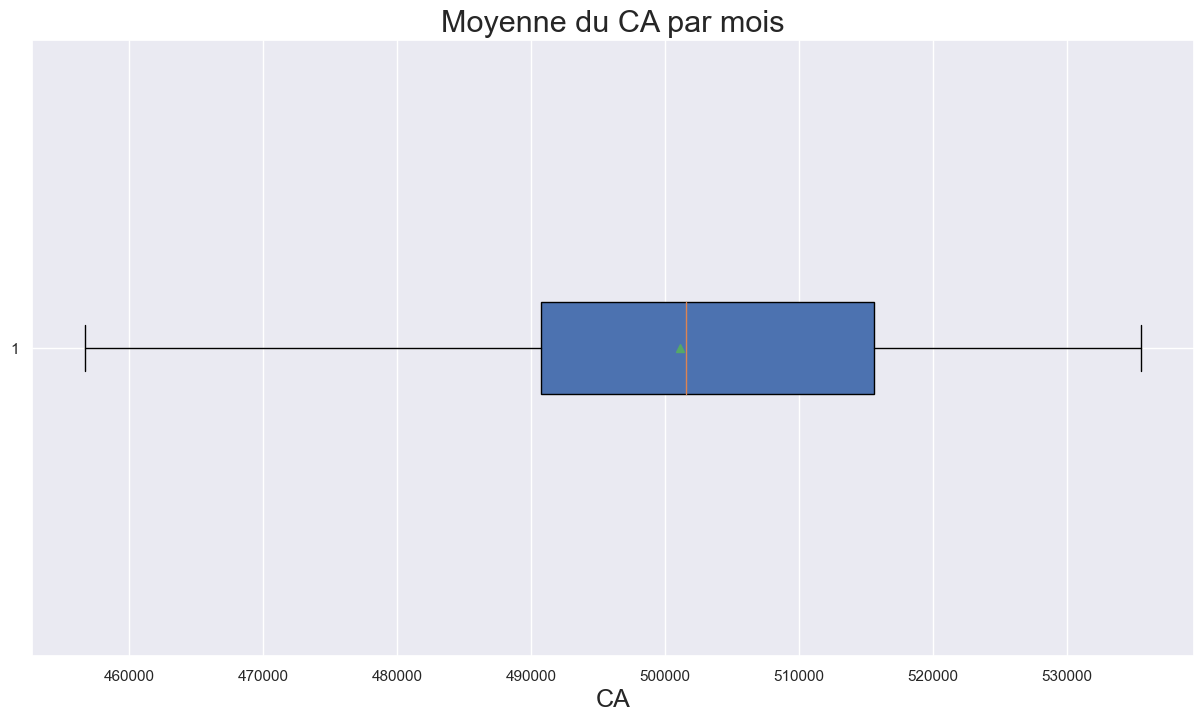

In [486]:
plt.boxplot(evol_mois_sum['price'], showfliers=False, 
            vert=False, patch_artist=True, showmeans=True)
plt.xlabel('CA', fontsize=18)
plt.title('Moyenne du CA par mois', fontsize=22)

plt.show()

In [147]:
MMventes=evol_mois_sum.rolling(window=3).mean()

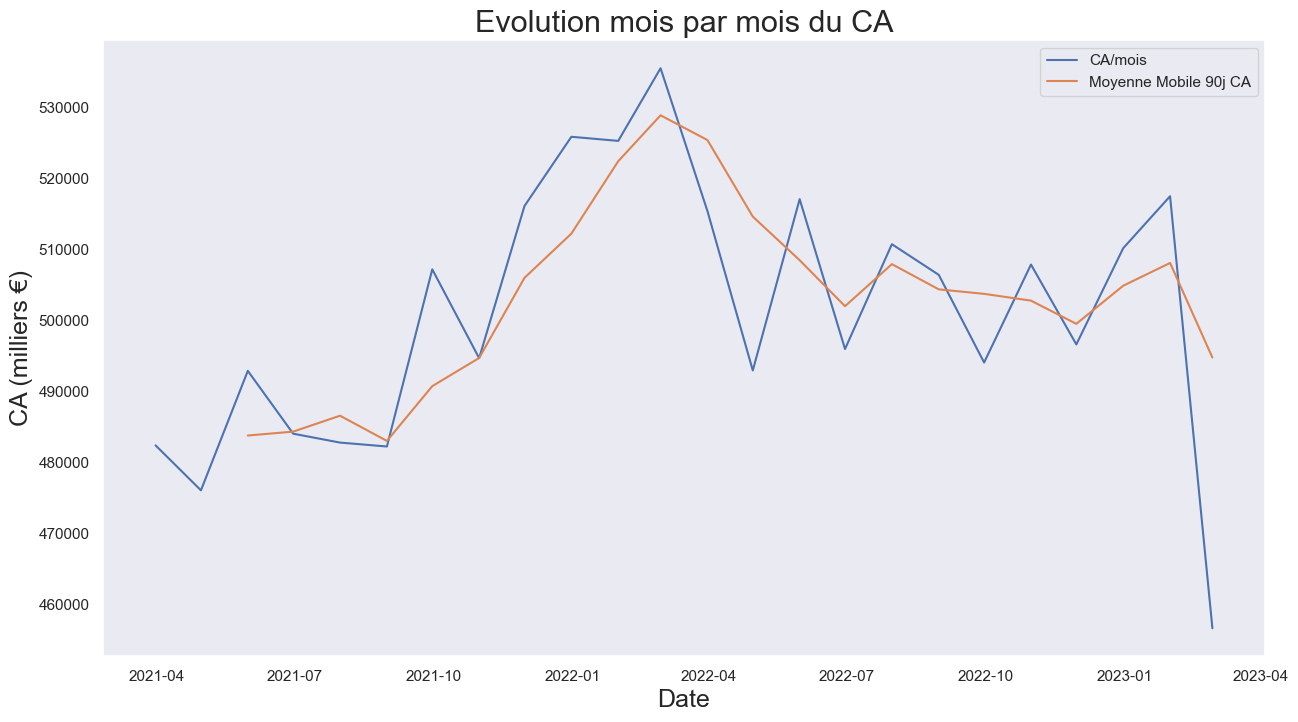

In [148]:
sns.lineplot(data=evol_mois_sum, x='date', y='price')
sns.lineplot(data=MMventes, x='date', y='price')
plt.ylabel('CA (milliers \u20ac)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend(labels=['CA/mois','Moyenne Mobile 90j CA'])
plt.grid()
plt.title('Evolution mois par mois du CA', fontsize=22)
plt.show()

## Projection sur 2023

Pour faire la projection, nous allons utilisé le modèle Holt-Winters. Il est simple à utiliser même si d'autres modèles sont plus efficaces

In [149]:
df5=evol_mois_sum.iloc[:,:1].rename(columns={'price':'CA'})
df5.head()

,CA
date,
2021-03-31,482440.61
2021-04-30,476109.30
2021-05-31,492943.47
2021-06-30,484088.56
2021-07-31,482835.40


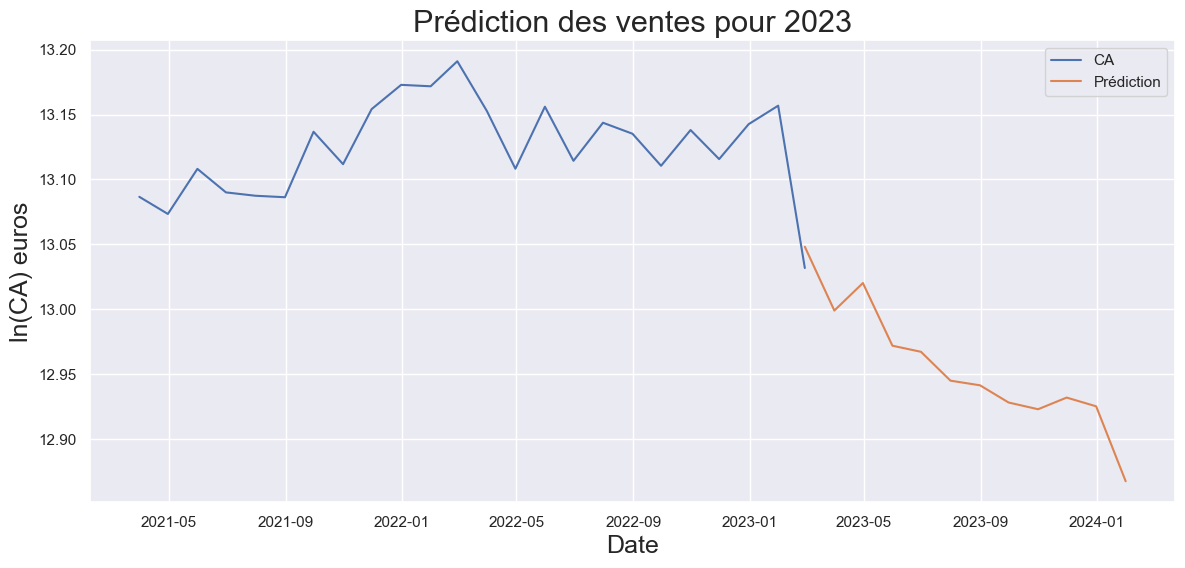

In [150]:
from statsmodels.tsa.api import ExponentialSmoothing
x = df5
y = np.log(df5)

hw = ExponentialSmoothing(np.asarray(y['CA']), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['CA'], label='CA')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Prédiction')
plt.title('Prédiction des ventes pour 2023', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('ln(CA) euros', fontsize=18)
plt.legend()
plt.show()

## Répartition par catégorie

In [151]:
CAcateg=liaisonF.groupby('categ').sum()
CAcateg['price']/=1000000
CAcateg['price']=round(CAcateg['price'],2)

In [273]:
prixcateg=liaisonF.iloc[:,4:6]


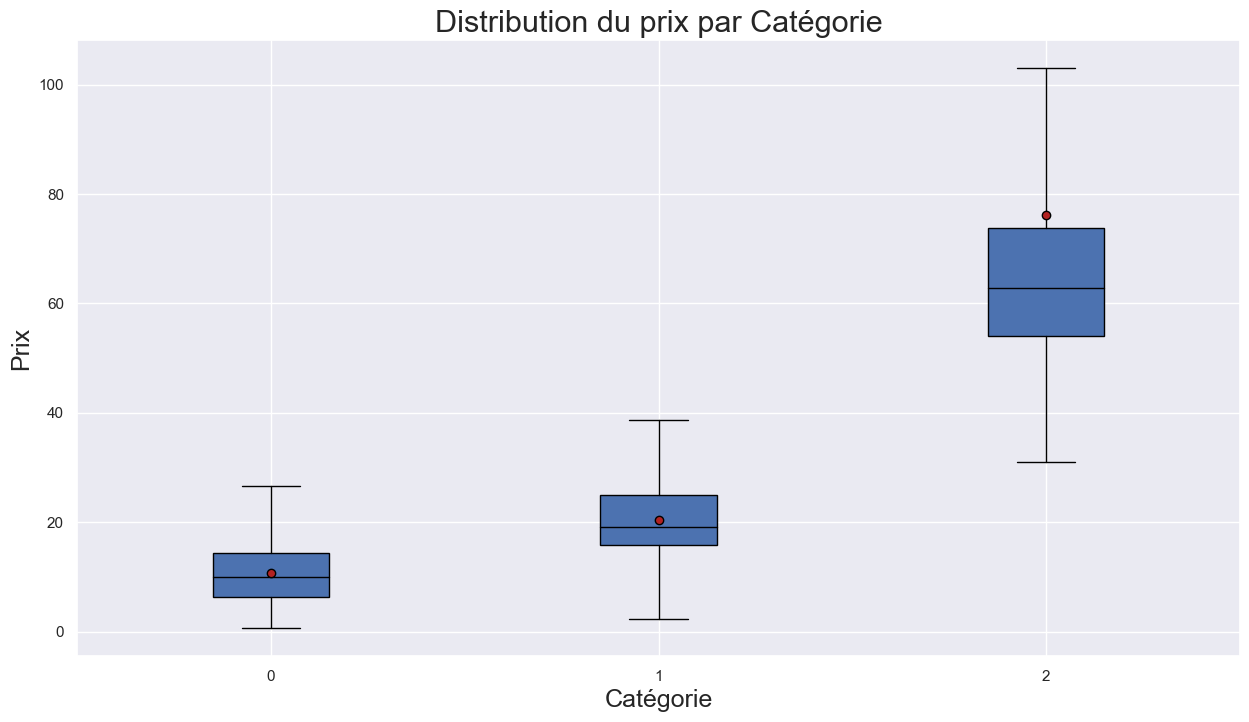

In [280]:
S = 'categ' # qualitative
T = 'price' # quantitative

modalites2 = prixcateg[S].unique()
groupes2 = []
for m in modalites2:
    groupes2.append(prixcateg[prixcateg[S]==m][T])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes2, labels=modalites2, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Prix', fontsize=18)
plt.xlabel('Catégorie', fontsize=18)
plt.title('Distribution du prix par Catégorie', fontsize=22)

plt.show()

## Top et flop des catégories (barchart)

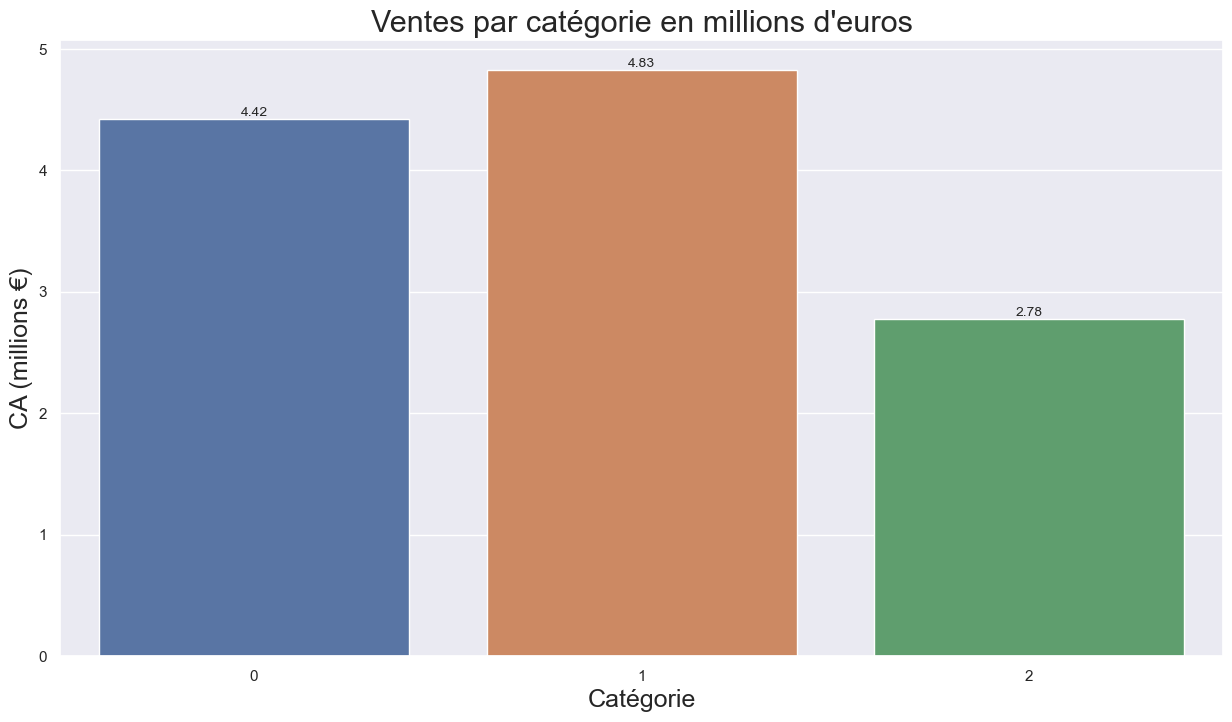

In [152]:
labels=[0,1,2]
ax=sns.barplot(data=CAcateg, x=labels, y='price')
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel('CA (millions \u20ac)', fontsize=18)
plt.xlabel('Catégorie', fontsize=18)
plt.title("Ventes par catégorie en millions d'euros", fontsize=22)
plt.show()

## piechart

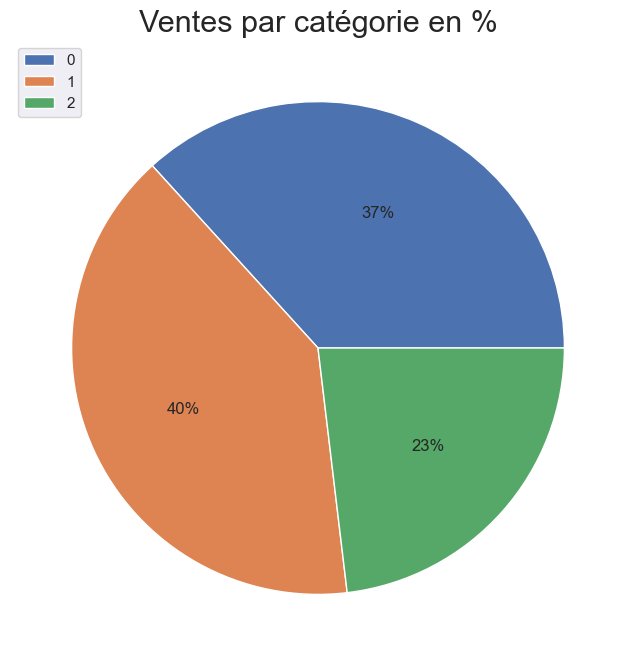

In [153]:
plt.pie(data=CAcateg, x='price', autopct='%.0f%%')
plt.title("Ventes par catégorie en %", fontsize=22)
plt.legend(labels=labels)

plt.show()

In [154]:
ventes_categ=liaisonF.groupby('categ').count()
ventes_categ

,id_prod,session_id,client_id,date,price,_merge,sex,birth,age,merge2
categ,,,,,,,,,,
0,415459,415459,415459,415459,415459,415459,415459,415459,415459,415459
1,235592,235592,235592,235592,235592,235592,235592,235592,235592,235592
2,36483,36483,36483,36483,36483,36483,36483,36483,36483,36483


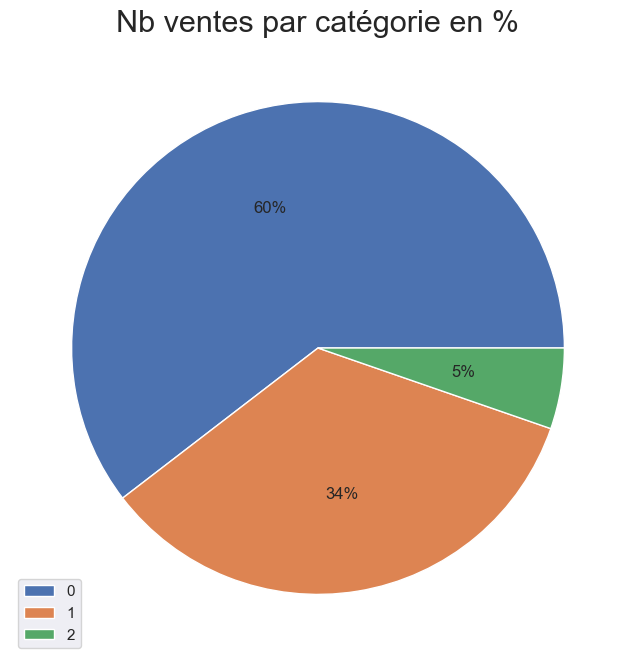

In [155]:
plt.pie(data=ventes_categ, x='price', autopct='%.0f%%')
plt.title("Nb ventes par catégorie en %", fontsize=22)
plt.legend(labels=labels)

plt.show()

## Répartition par catégorie dans le temps (linechart)

On regarde dans le temps l'évolution des ventes par catégorie

In [156]:
evol_cat_mois=liaisonF.groupby([pd.Grouper(key='date', freq='1M'),'categ']).sum()
evol_cat_mois

price       birth       age
date       categ                                 
2021-03-31 0      193629.17  35866261.0  812752.0
           1      186974.17  18035620.0  442462.0
           2      101837.27   2666359.0   36369.0
2021-04-30 0      205222.46  38263081.0  865785.0
           1      156138.35  14962506.0  369811.0
...                     ...         ...       ...
2023-01-31 1      210104.41  20240270.0  499526.0
           2      126153.08   3230609.0   42605.0
2023-02-28 0      162457.00  30174402.0  686463.0
           1      180347.24  17353680.0  426467.0
           2      113875.52   2995325.0   41198.0

[72 rows x 3 columns]

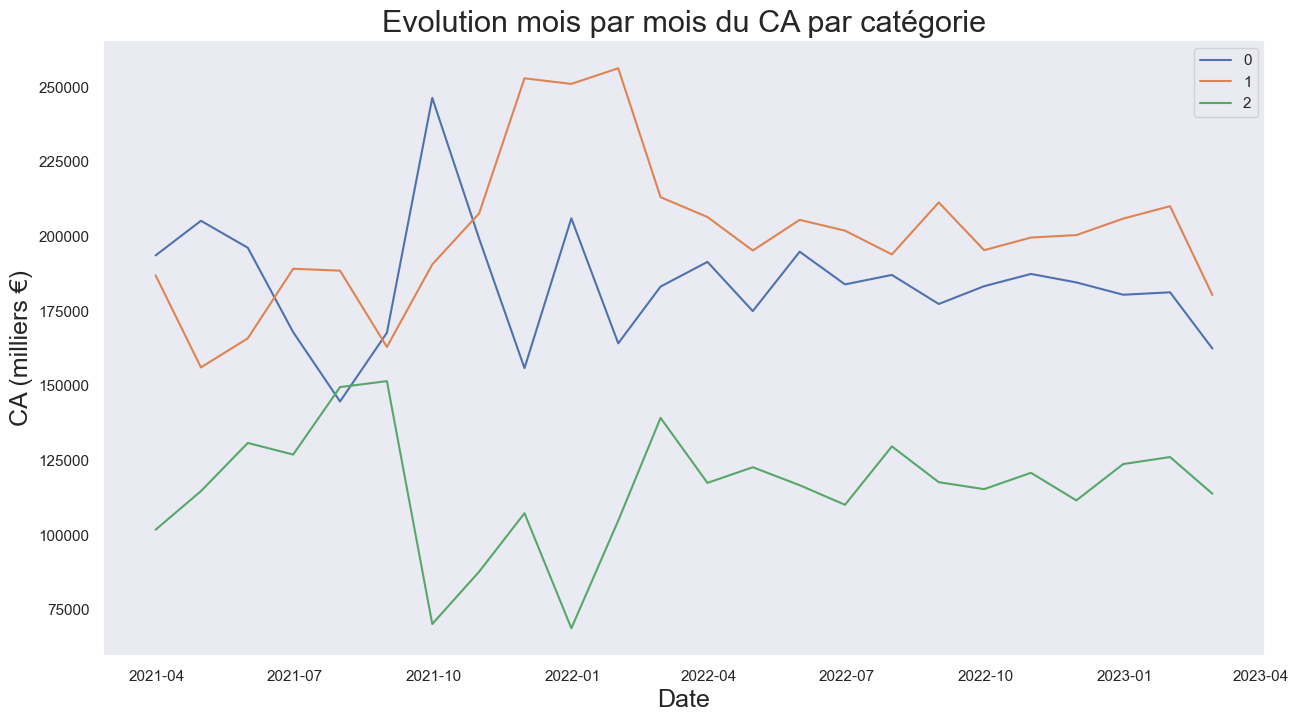

In [157]:
sns.lineplot(data=evol_cat_mois, x='date', y='price', hue='categ')
plt.ylabel('CA (milliers \u20ac)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.grid()
plt.title('Evolution mois par mois du CA par catégorie', fontsize=22)
plt.show()

## Courbes de Pareto

### Courbe de pareto sur les produits

In [158]:
pareto=liaisonF.groupby('id_prod').count().rename(columns={'session_id':'count'}).iloc[:,:1].sort_values(by='count', ascending=False)
pareto['cumperc']=pareto['count'].cumsum()/pareto['count'].sum()*100
pareto

,count,cumperc
id_prod,,
1_369,2340,0.340347
1_417,2269,0.670367
1_414,2246,0.997042
1_498,2202,1.317317
1_425,2163,1.631919
...,...,...
0_549,1,99.999418
0_886,1,99.999564
0_1498,1,99.999709


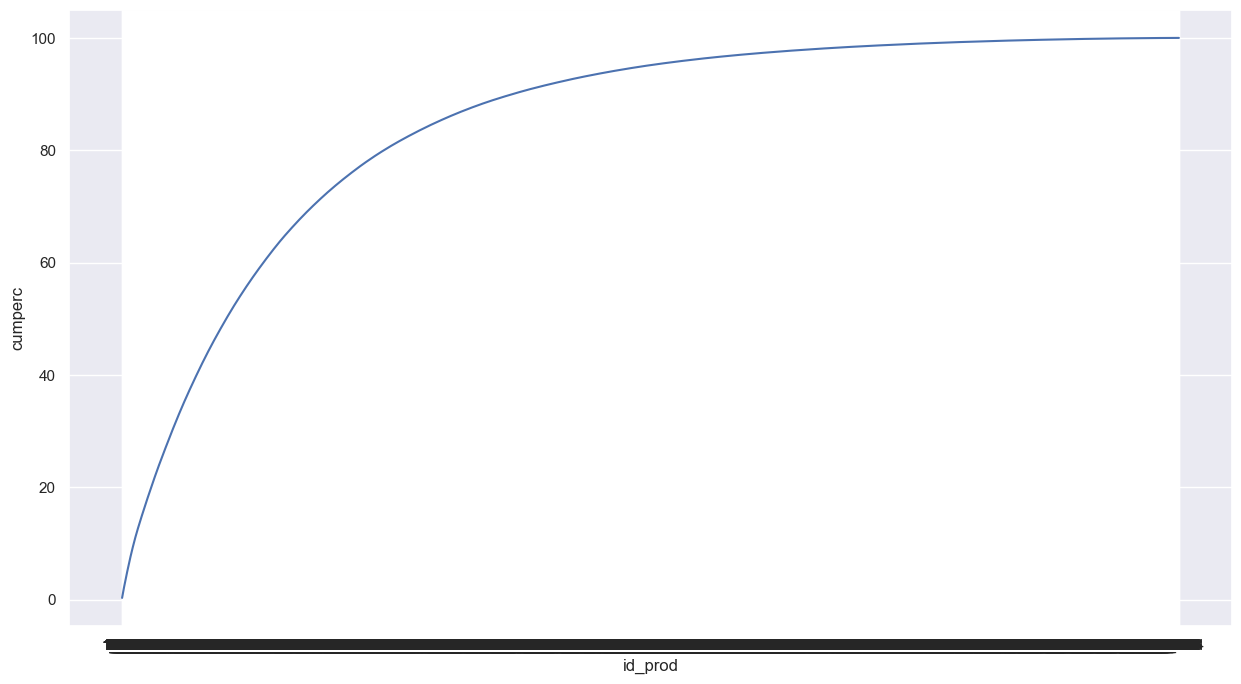

In [159]:
sns.lineplot(data=pareto, x=pareto.index, y=pareto['cumperc'])

plt.show()

### Courbe de pareto sur les catégories de produits

In [160]:
pareto_categ=liaisonF.groupby('categ').count().rename(columns={'id_prod':'count'}).iloc[:,:1].sort_values(by='count', ascending=False)
pareto_categ['cumperc']=pareto_categ['count'].cumsum()/pareto_categ['count'].sum()*100
pareto_categ=pareto_categ.reset_index()


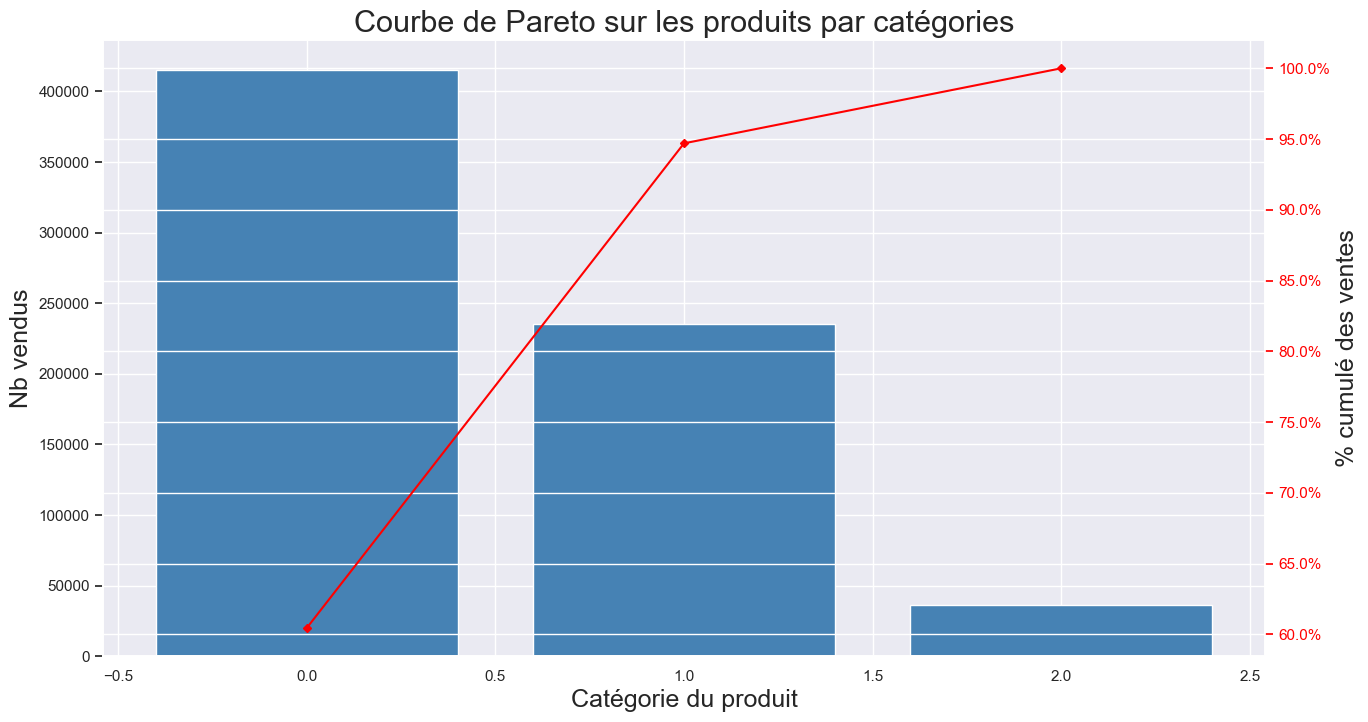

In [161]:
from matplotlib.ticker import PercentFormatter
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(pareto_categ['categ'], pareto_categ['count'], color=color1)
plt.ylabel('Nb vendus', fontsize=18)
plt.xlabel('Catégorie du produit', fontsize=18)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(pareto_categ['categ'], pareto_categ['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color2)

plt.ylabel('% cumulé des ventes', fontsize=18)
plt.title('Courbe de Pareto sur les produits par catégories', fontsize=22)

#display Pareto chart
plt.show()

## Répartition du CA par clients

Nous allons essayer de savoir si notre CA est effectué par quelques clients seulement ou par un grand nombre de clients

### Top clients

Pour information, voici notre top 10 des clients qui dépensent le plus

In [162]:
CA_clients=liaisonF.groupby('client_id').sum().sort_values('price',ascending=False)
CA_clients.iloc[0:10,0:1]

,price
client_id,
c_1609,326039.89
c_4958,290227.03
c_6714,153918.60
c_3454,114110.57
c_1570,5285.82
c_3263,5276.87
c_2140,5260.18
c_2899,5214.05
c_7319,5155.77


In [163]:
CA_clients.mean()

price      1398.565477
birth    158118.221163
age        3612.160465
dtype: float64

Les 4 premiers client ont des dépenses conséquentes. On déduit que ce sont des professionnels qui achètent en BtoB. Nous pouvons rajouter une colonne dans ce df pour caractériser cette relation et pouvoir filtrer par la suite. 

In [164]:
liste_cl_pro=['c_1609','c_4958','c_6714','c_3454']
liaisonF['type_clients']='particulier'
liaisonF['type_clients'].loc[liaisonF['client_id'].isin(liste_cl_pro)]='professionnel'

C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\211495798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liaisonF['type_clients'].loc[liaisonF['client_id'].isin(liste_cl_pro)]='professionnel'


### Comportement clients (courbe Lorenz)

Combien représente en CA et en nombre de transactions nos clients professionnels ? 

In [165]:
CA_total = sum(liaisonF['price'])
CA_B2B =liaisonF['price'].loc[liaisonF['type_clients']=='professionnel'].sum()
print('Nos clients professionnels représentent un CA de ' + str(round(CA_B2B/1000,2)) + ' milliers d\'euros soit ' + str(round(CA_B2B/CA_total*100,2)) + ' % du CA global')

Nos clients professionnels représentent un CA de 884.3 milliers d'euros soit 7.35 % du CA global


In [166]:
nb_trans_total=liaisonF['price'].count()
nb_trans_B2B=liaisonF['price'].loc[liaisonF['type_clients']=='professionnel'].count()
print('Nos clients professionnels ont fait ' + str(nb_trans_B2B) + ' transactions soit ' + str(round(nb_trans_B2B/nb_trans_total*100,2)) + ' % du global')

Nos clients professionnels ont fait 46800 transactions soit 6.81 % du global


In [167]:
liaisonF

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2,type_clients
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
1,0_1259,s_275943,c_329,2022-10-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
2,0_1259,s_305291,c_329,2022-12-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
3,0_1259,s_320153,c_329,2023-01-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
4,1_397,s_123998,c_329,2021-11-23 18:21:56.361813,18.99,1,both,f,1967.0,56.0,both,particulier
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier
687531,1_64,s_136405,c_712,2021-12-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier
687532,1_64,s_284469,c_712,2022-10-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier


Le pie chart permet de visualiser encore mieux la représentation

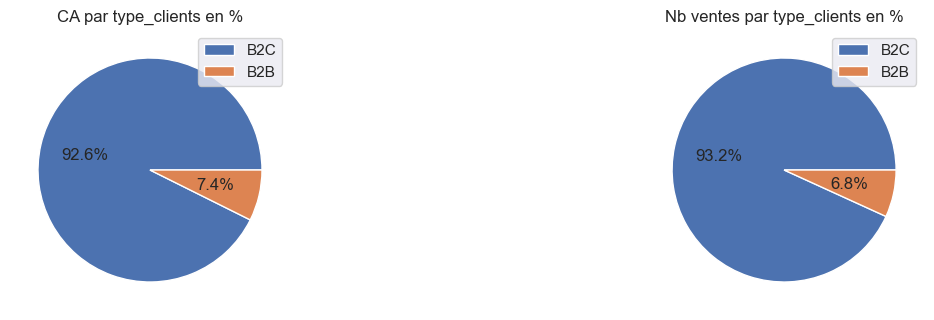

In [168]:
plt.subplot(221)
plt.pie(data=liaisonF.groupby('type_clients').sum(), x='price', autopct='%1.1f%%')

plt.title('CA par type_clients en %')
plt.legend(labels=['B2C','B2B'])

plt.subplot(222)
plt.pie(data=liaisonF.groupby('type_clients').count(), x='price', autopct='%1.1f%%')

plt.title('Nb ventes par type_clients en %')
plt.legend(labels=['B2C','B2B'])

plt.show()

In [169]:
liaisonF

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2,type_clients
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
1,0_1259,s_275943,c_329,2022-10-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
2,0_1259,s_305291,c_329,2022-12-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
3,0_1259,s_320153,c_329,2023-01-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier
4,1_397,s_123998,c_329,2021-11-23 18:21:56.361813,18.99,1,both,f,1967.0,56.0,both,particulier
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier
687531,1_64,s_136405,c_712,2021-12-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier
687532,1_64,s_284469,c_712,2022-10-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier


In [170]:
clients_part=liaisonF.loc[liaisonF['type_clients']=='particulier']
clients_part.groupby('client_id').sum()

,price,birth,age
client_id,,,
c_1,629.02,84065.0,2924.0
c_10,1353.60,113448.0,3886.0
c_100,254.85,15936.0,248.0
c_1000,2291.88,247716.0,7182.0
c_1001,1823.85,204146.0,4223.0
...,...,...,...
c_995,189.41,27370.0,952.0
c_996,1637.34,189120.0,5088.0
c_997,1490.01,117646.0,1711.0


Maintenant que nous avons nos clients particuliers, attaquons la courbe de Lorenz

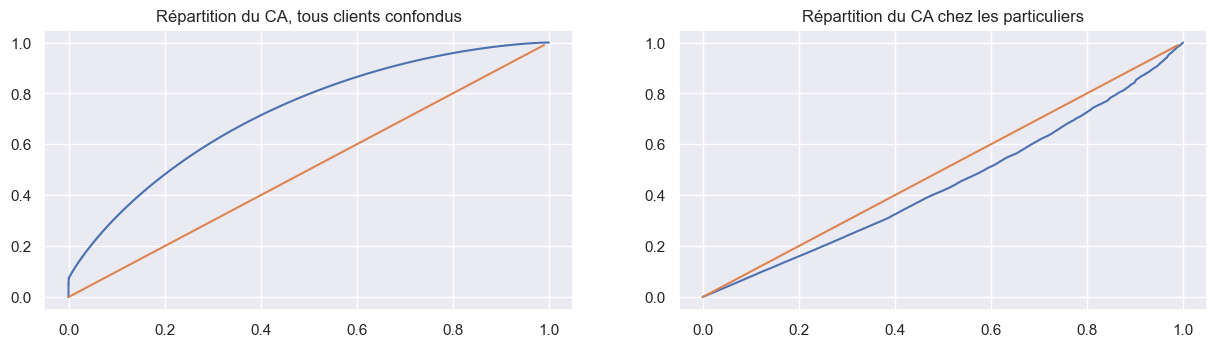

In [171]:
 # Bissectrice
a = np.arange(0,1,.01)
x = a
y = a

#1ère courbe
plt.subplot(221)
n1 = len(CA_clients['price'])

lorenz = np.cumsum(CA_clients['price']) / CA_clients['price'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


xaxis = np.linspace(0-1/n1,1+1/n1,n1+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

sns.lineplot(x=xaxis,y=lorenz,drawstyle='steps-post')
sns.lineplot(x=x,y=y)
plt.title('Répartition du CA, tous clients confondus')




#Seconde courbe
plt.subplot(222)

n2 = len(clients_part['price'])
lorenz2=np.cumsum(clients_part['price']) / clients_part['price'].sum()
lorenz2 = np.append([0],lorenz2) # La courbe de Lorenz commence à 0

xaxis2 = np.linspace(0-1/n2,1+1/n2,n2+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

sns.lineplot(x=xaxis2,y=lorenz2,drawstyle='steps-post')
sns.lineplot(x=x,y=y)

plt.title('Répartition du CA chez les particuliers')


plt.show()

Si nous prenons tous nos clients,la distribution du CA par client est inégalitaire : 50% de nos clients cumulent 80% du CA.
En revanche si nous prenons uniquement les clients particuliers, la répartition des achats est plutôt égalitaire. 

# Réponses demande Julie

## Lien entre le genre d’un client et les catégories des livres achetés

### Premières études sur le genre des clients

Nous allons d'abord étudier le genre des clients particuliers

In [172]:
clients_part.groupby('sex').count()

,id_prod,session_id,client_id,date,price,categ,_merge,birth,age,merge2,type_clients
sex,,,,,,,,,,,
f,333494,333494,333494,333494,333494,333494,333494,333494,333494,333494,333494
m,307240,307240,307240,307240,307240,307240,307240,307240,307240,307240,307240


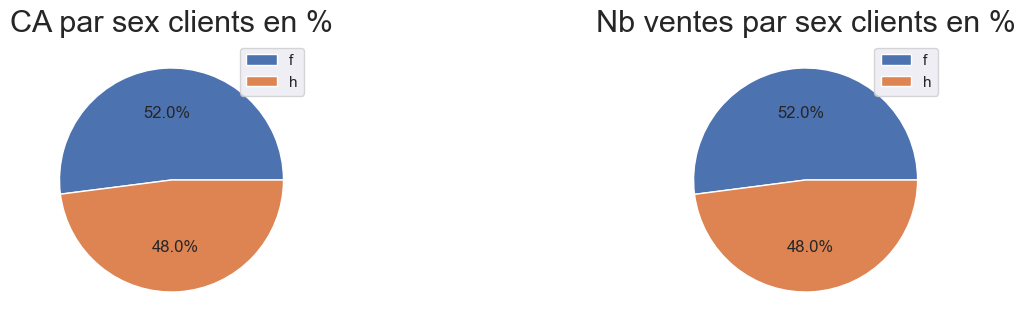

In [173]:
plt.subplot(221)

plt.pie(data=clients_part.groupby('sex').sum(), x='price', autopct='%1.1f%%')

plt.title('CA par sex clients en %', fontsize=22)
plt.legend(labels=['f','h'])

plt.subplot(222)

plt.pie(data=clients_part.groupby('sex').count(), x='price', autopct='%1.1f%%')

plt.title('Nb ventes par sex clients en %', fontsize=22)
plt.legend(labels=['f','h'])

plt.show()

Notre répartition client de vente selon le sex  que ce soit en transaction ou en CA est assez égale, même si nous avons un tout petit peu plus de clientes.

On peut visualiser la répartition du nombre de ventes par catégorie et sex : 

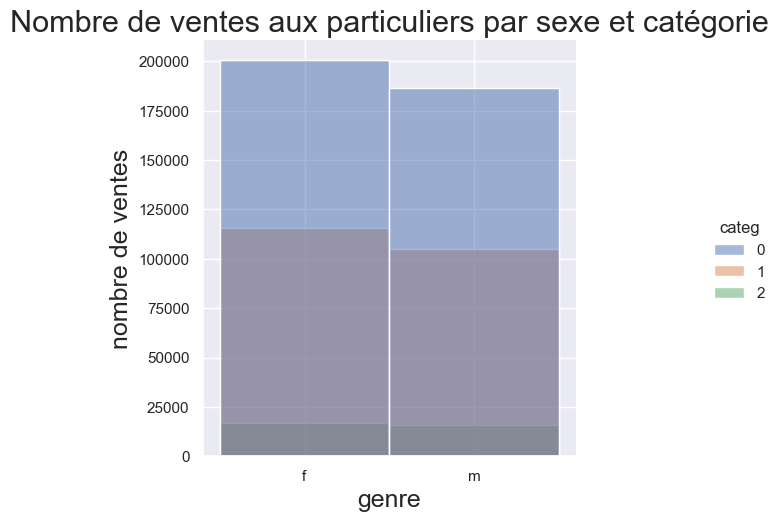

In [174]:
sns.displot(data=clients_part, x='sex', hue='categ')
plt.ylabel('nombre de ventes', fontsize=18)
plt.xlabel('genre', fontsize=18)
plt.title('Nombre de ventes aux particuliers par sexe et catégorie', fontsize=22)
plt.show()

### Hypothèse

Nous allons poser 2 hypothèses pour voir laquelle est vraie.  
Hypothèse H0 : il n'y a pas de lien entre genre et catégorie.  
Hypothèse H1 : Il y a un lien entre genre et catégorie.

Il s'agit de deux valeurs qualitatives: 2 groupes pour le genre (f et m) et 3 groupes pour la catégorie (0, 1 et 2). Nous allons utilisé la méthode du xhi test

Nous allons d'abord créer notre tableau de contingence

In [175]:
X = 'sex'
Y = 'categ'

cont = clients_part[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name='Total')
cont1=cont.iloc[:-1,:-1]
cont1

categ,0,1,2
sex,,,
f,200793,115721,16980
m,186488,104884,15868


A partir de ce tableau de contingence, nous réalisons un test de xhi2

In [176]:
chi2, pvalue, degrees, expected = scipy.stats.chi2_contingency(cont1)
pvalue

1.1955928116587024e-05

In [449]:
crosstab=pd.crosstab(clients_part['categ'], clients_part['sex'], margins=False)
crosstab

sex,f,m
categ,,
0,200793,186488
1,115721,104884
2,16980,15868


In [450]:
import researchpy as rp

# Table de contingence normalisée
table, results = rp.crosstab(clients_part['categ'], clients_part['sex'], prop='col', test='chi-square')

AttributeError: module 'researchpy' has no attribute 'cont1'

In [439]:
print(table)

          sex                
sex         f       m     All
categ                        
0       60.21   60.70   60.44
1       34.70   34.14   34.43
2        5.09    5.16    5.13
All    100.00  100.00  100.00


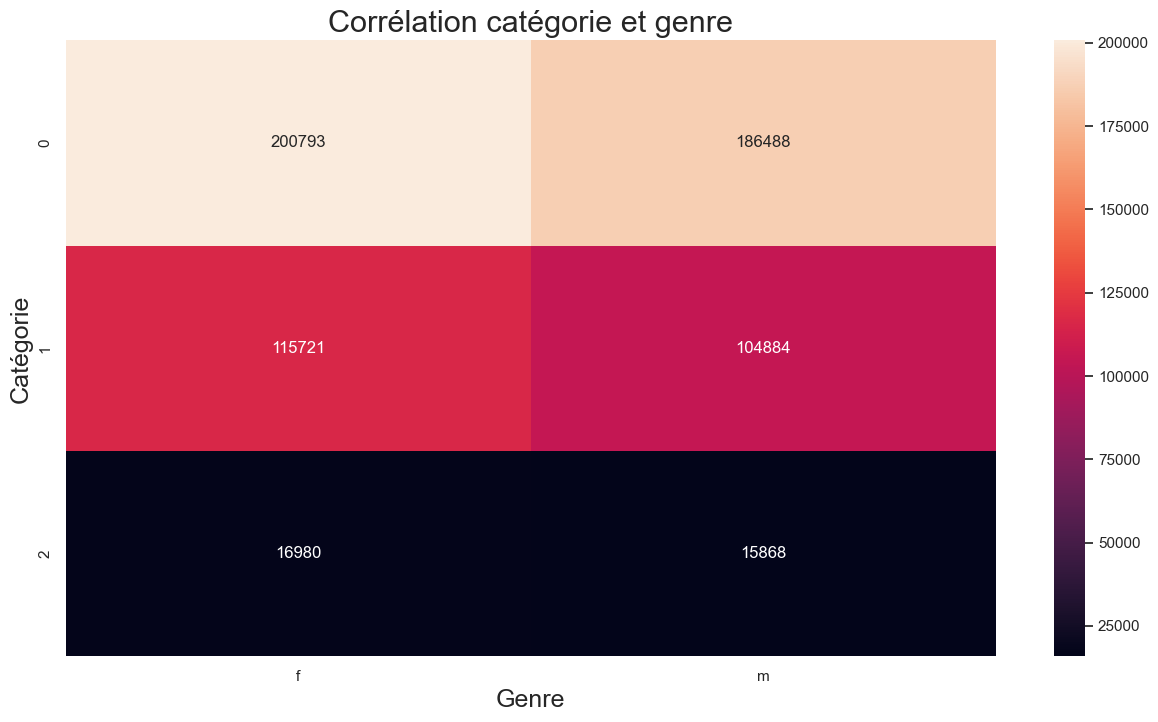

In [466]:
sns.heatmap(crosstab,annot=True,  fmt=".0f")
plt.ylabel('Catégorie', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.title('Corrélation catégorie et genre', fontsize=22)
plt.show()

In [445]:
stat, p, dof, expected = scipy.stats.chi2_contingency(table)

In [465]:
# Test de Chi 2
sample_df = clients_part.sample(1500)
table = pd.crosstab(clients_part['categ'], clients_part['sex'], margins=False)
stat, p, dof, expected = scipy.stats.chi2_contingency(table)
print('Test de Chi 2 (2 catégorielles)')
print('Stat = %.3f\np-value = %.35f' % (stat, p))
if p > .05:
    print('H0: the two samples are independent')
else:
    print('H1: there is a dependency between the samples.')
print('\nConditions :\n'
      '- Observations used in the calculation of the contingency table are independent.',
      '\n- 25 or more examples in each cell of the contingency table.')

Test de Chi 2 (2 catégorielles)
Stat = 22.669
p-value = 0.00001195592811658702441597514759541
H1: there is a dependency between the samples.

Conditions :
- Observations used in the calculation of the contingency table are independent. 
- 25 or more examples in each cell of the contingency table.


La Pvalue est inférieure à 5% (et même à 1%) ce qu'il nous fait dire qu'il  existe une association statistiquement très significative entre les variables catégorie et sex.  
De plus la conditions sur l'indépendance est acquise et la conditions sur la présence de +5 valeurs est acquise aussi

### Visualisation

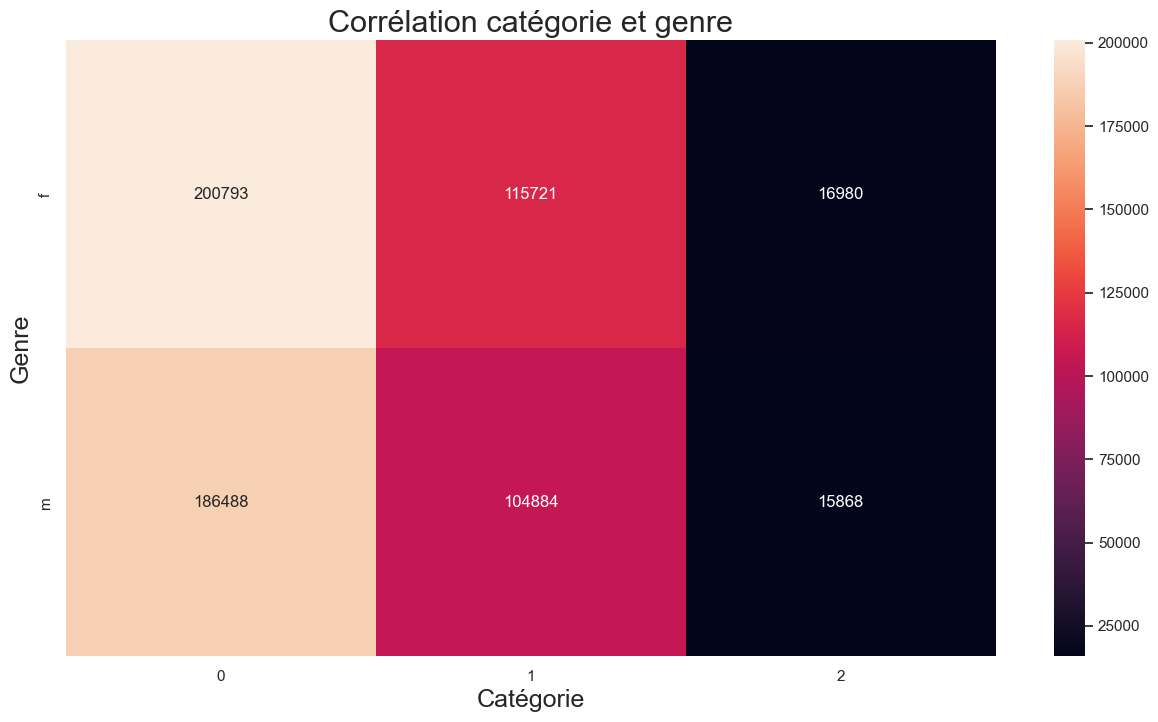

In [234]:
sns.heatmap(cont1,annot=True,  fmt=".0f")
plt.ylabel('Genre', fontsize=18)
plt.xlabel('Catégorie', fontsize=18)
plt.title('Corrélation catégorie et genre', fontsize=22)
plt.show()

Visuellement, on remarque que les couleurs sont proches pour la catégorie 2 mais différentes pour les autres catégories

In [431]:
test26=clients_part.pivot_table(index='categ',columns='sex',aggfunc=len, margins=True,margins_name="Total").reset_index().iloc[0:3,0:3]
test26

categ  _merge        
sex             f       m
0       0  200793  186488
1       1  115721  104884
2       2   16980   15868

In [434]:
test26['_merge'].reset_index()

sex,index,f,m
0,0,200793,186488
1,1,115721,104884
2,2,16980,15868


In [425]:
clients_part.groupby('categ').count()['id_prod'].reset_index().rename(columns={'id_prod':'total'})

,categ,total
0,0,387281
1,1,220605
2,2,32848


In [426]:
clients_part.groupby('categ').count()['id_prod'].reset_index().rename(columns={'id_prod':'total'})

,categ,total
0,0,387281
1,1,220605
2,2,32848


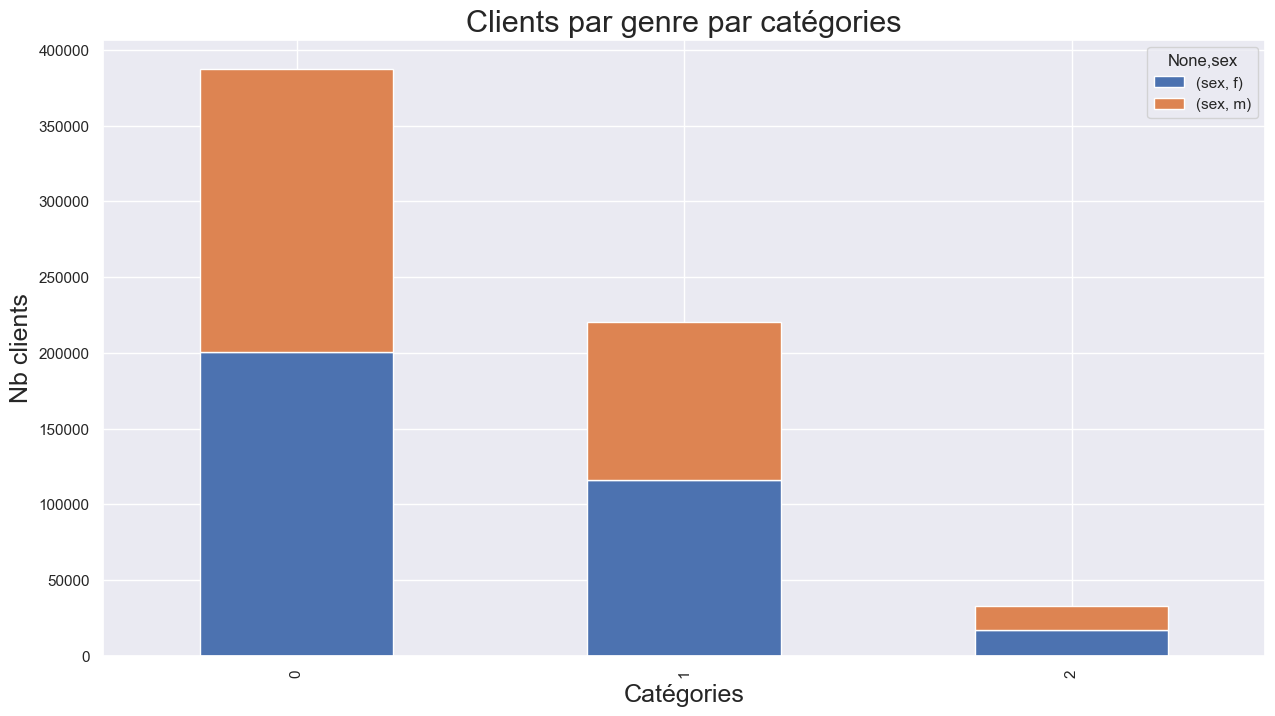

In [417]:
test26.plot(x='categ', kind='bar', stacked=True)
plt.xlabel('Catégories', fontsize=18)
plt.ylabel('Nb clients', fontsize=18)
plt.title('Clients par genre par catégories', fontsize=22)
plt.show()

In [ ]:
# from raw value to percentage
total = clients_part.groupby('categ').count()['id_prod'].reset_index().rename(columns={'id_prod':'total'})
smoker = clients_part[clients_part.sex=='h'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')


## Lien entre l'âge des clients et le montant total des achats

Calculons d'abord quelques données utiles

In [178]:
print('La moyenne d\'âge de nos clients est de '+ str(round(clients_part.groupby('client_id').mean()['age'].mean(),1)) + ' ans')
print('La médiane d\'âge de nos clients est de '+ str(round(clients_part.groupby('client_id').mean()['age'].median(),1)) + ' ans')

La moyenne d'âge de nos clients est de 44.7 ans
La médiane d'âge de nos clients est de 44.0 ans


In [179]:
clients_part.loc[clients_part['age']==19].shape

(15497, 12)

In [180]:
clients_part.shape

(640734, 12)

In [181]:
15497/640734

0.024186323809880544

In [182]:
test21=clients_part.groupby('client_id').mean().reset_index()
age_nombre=test21.groupby('age').count().reset_index().rename(columns = {'client_id': 'nombre'}).iloc[:,0:2]
age_nombre.sort_values('nombre', ascending=False)

,age,nombre
0,19.0,437
25,44.0,215
16,35.0,207
18,37.0,203
26,45.0,199
...,...,...
71,90.0,8
72,91.0,6
73,92.0,4
74,93.0,4


<AxesSubplot:xlabel='age', ylabel='nombre'>

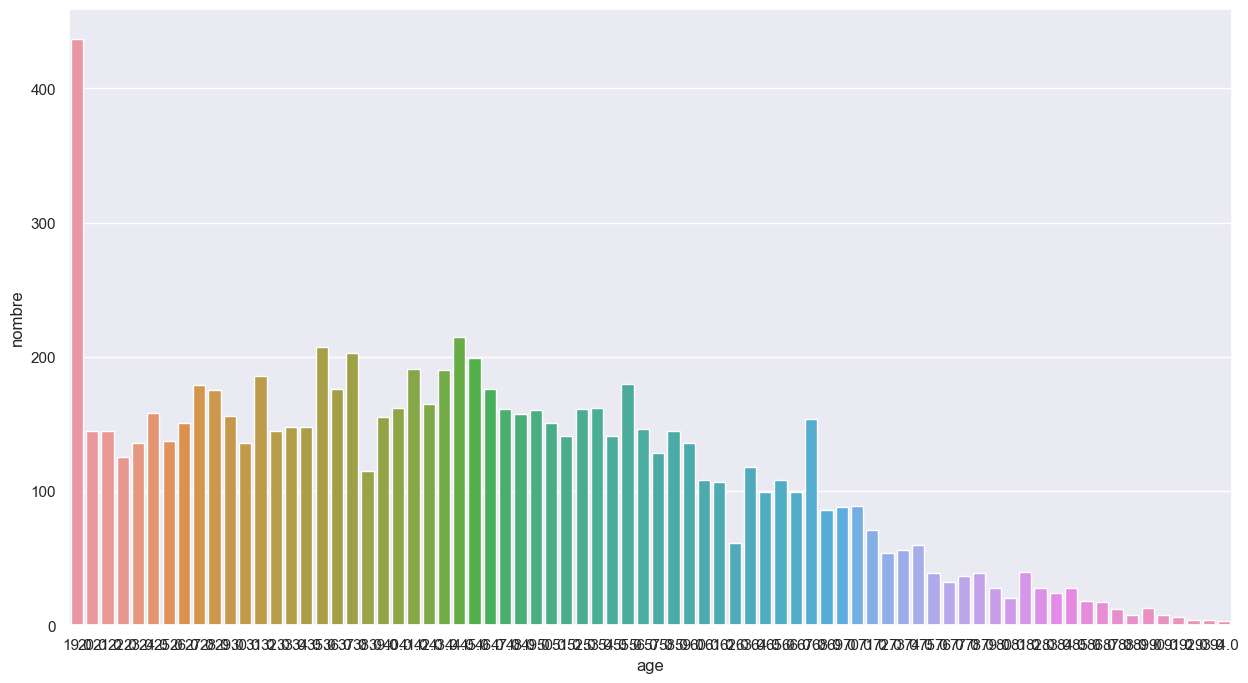

In [183]:
sns.barplot(data=age_nombre, x='age', y='nombre')

### Création des tranches d'âges

Nous allons commencer par créer les tranches d'âges de nos clients

In [184]:
clients_part['tranche_age'] = '18-30'
clients_part['tranche_age'].loc[(clients_part['age']>=30) & (clients_part['age']<40)] = '30-40'
clients_part['tranche_age'].loc[(clients_part['age']>=40) & (clients_part['age']<50)] = '40-50'
clients_part['tranche_age'].loc[(clients_part['age']>=50) & (clients_part['age']<60)] = '50-60'
clients_part['tranche_age'].loc[(clients_part['age']>=60) & (clients_part['age']<70)] = '60-70'
clients_part['tranche_age'].loc[(clients_part['age']>=70) & (clients_part['age']<80)] = '70-80'
clients_part['tranche_age'].loc[clients_part['age']>=80] = '80+'
clients_part

C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\1179623227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_part['tranche_age'] = '18-30'
C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\1179623227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_part['tranche_age'].loc[(clients_part['age']>=30) & (clients_part['age']<40)] = '30-40'
C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\1179623227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2,type_clients,tranche_age
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
1,0_1259,s_275943,c_329,2022-10-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
2,0_1259,s_305291,c_329,2022-12-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
3,0_1259,s_320153,c_329,2023-01-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
4,1_397,s_123998,c_329,2021-11-23 18:21:56.361813,18.99,1,both,f,1967.0,56.0,both,particulier,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier,18-30
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier,18-30
687531,1_64,s_136405,c_712,2021-12-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier,50-60
687532,1_64,s_284469,c_712,2022-10-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier,50-60


### Premières études sur la population de nos clients

Pour plus de visibilité sur nos clients sur leur répartition âge et genre. Nous pouvons commencer par visualiser notre population via une pyramide des âges

In [185]:
pyramide=clients_part.pivot_table(index='tranche_age',columns='sex', values='price', aggfunc='count').reset_index().sort_values('tranche_age', ascending=False)
pyramide['m']/=-1
pyramide=pyramide.sort_values('tranche_age', ascending=False)

In [186]:
pyramide

sex,tranche_age,f,m
6,80+,7201,-5740.0
5,70-80,15432,-11393.0
4,60-70,29664,-28372.0
3,50-60,53665,-48552.0
2,40-50,109849,-98661.0
1,30-40,83327,-82969.0
0,18-30,34356,-31553.0


In [187]:
pyramide3=clients_part.groupby(['sex','age']).count().reset_index().rename(columns = {'id_prod': 'nombre'}).iloc[:,0:3]
pyramide3['nombre'].loc[pyramide3['sex']=='m']*=(-1)
pyramide3

C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\4255993467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pyramide3['nombre'].loc[pyramide3['sex']=='m']*=(-1)


,sex,age,nombre
0,f,19.0,8063
1,f,20.0,2063
2,f,21.0,1971
3,f,22.0,2550
4,f,23.0,2649
...,...,...,...
147,m,90.0,-86
148,m,91.0,-24
149,m,92.0,-123
150,m,93.0,-53


In [188]:
pyramide3['age']=pyramide3['age'].astype('category')

In [189]:
pyramide3.dtypes

sex         object
age       category
nombre       int64
dtype: object

C:\Users\boisj\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\boisj\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


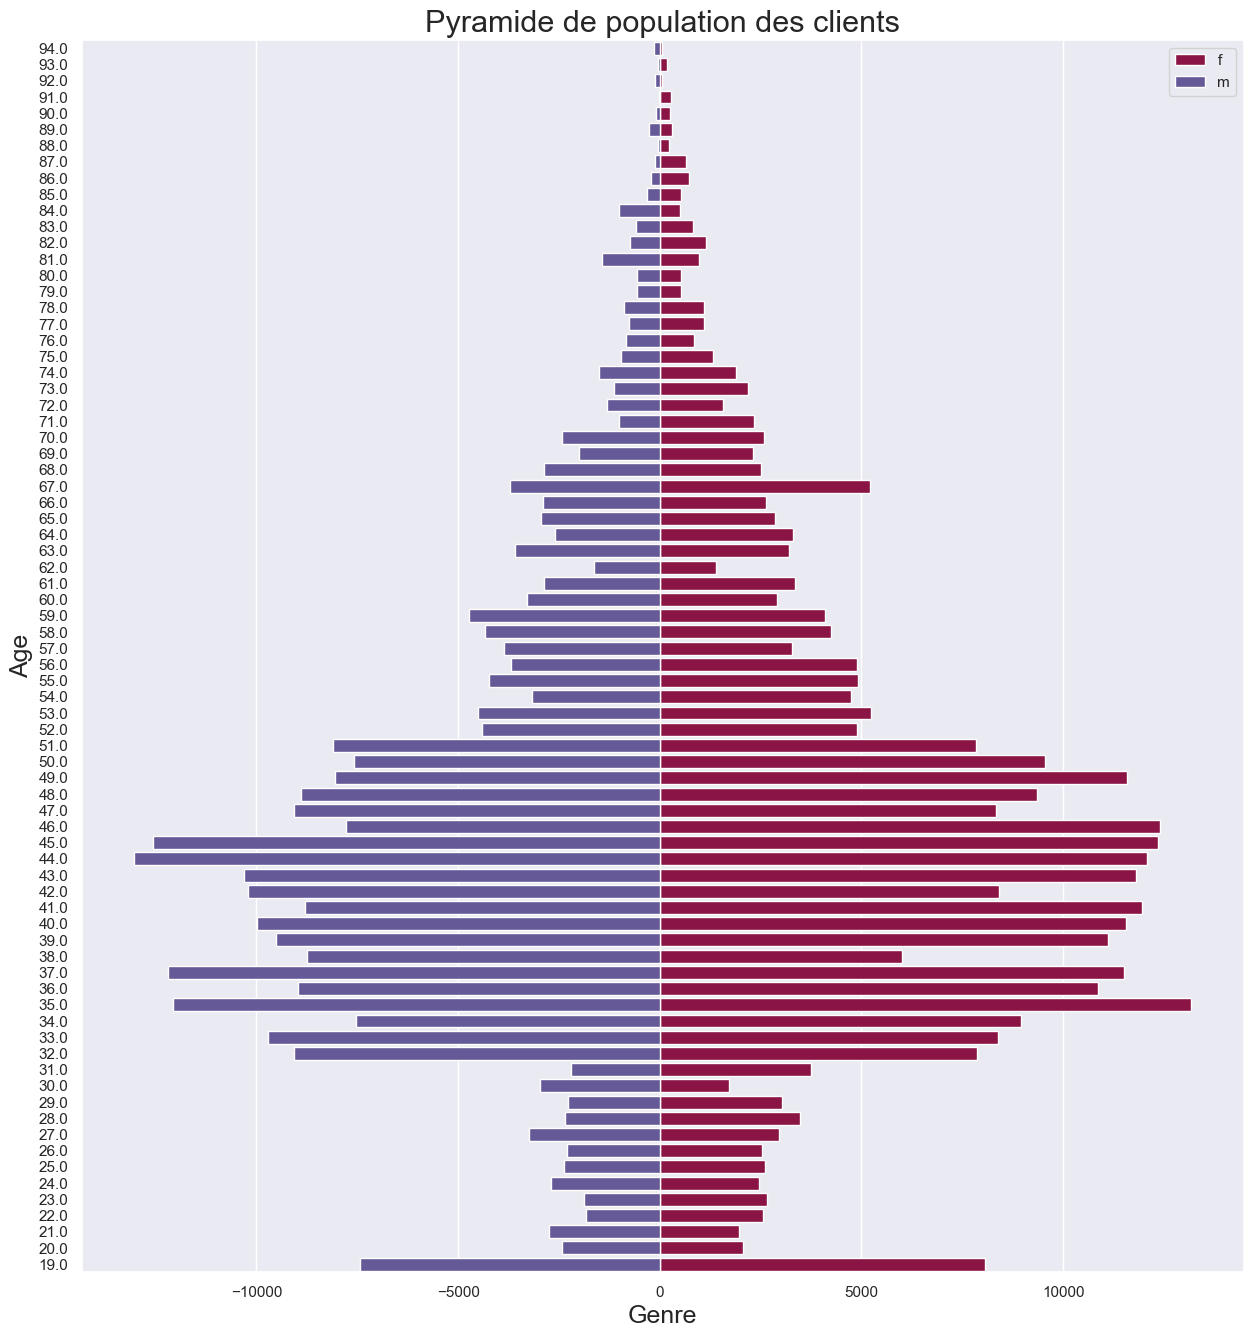

In [190]:
fig, ax = plt.subplots(figsize=(15, 16))

group_col = 'sex'

order_of_bars = pyramide3.age.unique()[::-1]

colors = [plt.cm.Spectral(i / float(len(pyramide3[group_col].unique()) - 1)) for i in range(len(pyramide3[group_col].unique()))]

for color, group in zip(colors, pyramide3[group_col].unique()):
    
    # Create a bar plot using Seaborn's barplot function
    sns.barplot(x='nombre',  # Data for the width of bars
                y='age',  # Data for the y-axis 
                data=pyramide3.loc[pyramide3[group_col] == group, :],  # Filter data for the current group
                order=order_of_bars,  # Specify the order of age on the y-axis
                color=color,  # Assign a color to the bar
                label=group,  # Assign a label for the plot legend
                ax=ax,  # Specify the axis to plot on (previously created)
               )

# Set labels and title for the axes
ax.set_xlabel('Genre', fontsize=18)  # X-axis label
ax.set_ylabel('Age', fontsize=18)
ax.set_title('Pyramide de population des clients', fontsize=22) # Plot title

# Display the legend, which shows labels for the groups
ax.legend()

# Display the plot
plt.show()

In [191]:
pyramide2=clients_part.groupby(['sex','tranche_age']).count().reset_index().rename(columns = {'id_prod': 'nombre'}).iloc[:,0:3]
pyramide2['nombre'].loc[pyramide2['sex']=='m']*=(-1)
pyramide2

C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\3150311444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pyramide2['nombre'].loc[pyramide2['sex']=='m']*=(-1)


,sex,tranche_age,nombre
0,f,18-30,34356
1,f,30-40,83327
2,f,40-50,109849
3,f,50-60,53665
4,f,60-70,29664
5,f,70-80,15432
6,f,80+,7201
7,m,18-30,-31553
8,m,30-40,-82969
9,m,40-50,-98661


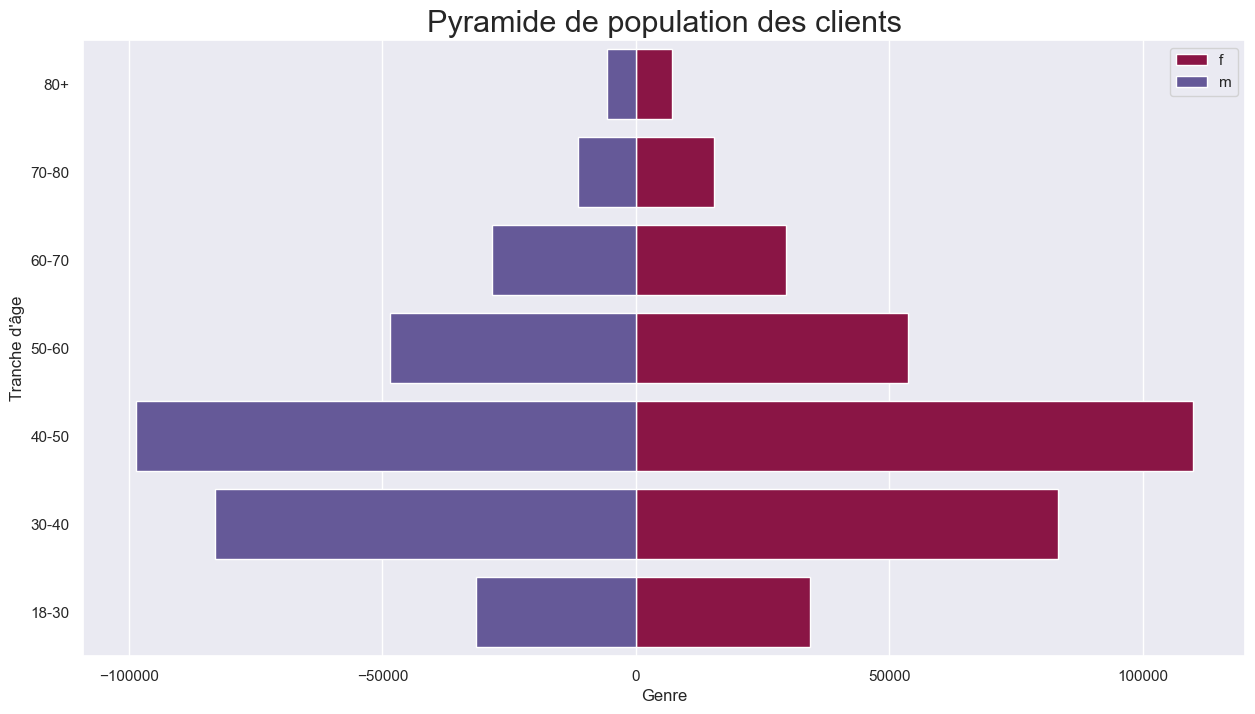

In [192]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(15, 8))

# Define the column in the dataframe that represents the groups/categories
group_col = 'sex'

# Determine the order of bars on the y-axis by unique values in the 'Stage' column and reversing the order
order_of_bars = pyramide2.tranche_age.unique()[::-1]

# Generate a list of colors for each group, using the Spectral colormap
colors = [plt.cm.Spectral(i / float(len(pyramide2[group_col].unique()) - 1)) for i in range(len(pyramide2[group_col].unique()))]

# Iterate through each group and plot a bar for each stage within that group
for color, group in zip(colors, pyramide2[group_col].unique()):
    
    # Create a bar plot using Seaborn's barplot function
    sns.barplot(x='nombre',  # Data for the width of bars
                y='tranche_age',  # Data for the y-axis (stages of purchase)
                data=pyramide2.loc[pyramide2[group_col] == group, :],  # Filter data for the current group
                order=order_of_bars,  # Specify the order of stages on the y-axis
                color=color,  # Assign a color to the bar
                label=group,  # Assign a label for the plot legend
                ax=ax,  # Specify the axis to plot on (previously created)
               )

# Set labels and title for the axes
ax.set_xlabel('Genre')  # X-axis label
ax.set_ylabel('Tranche d\'âge')
ax.set_title('Pyramide de population des clients', fontsize=22) # Plot title

# Display the legend, which shows labels for the groups
ax.legend()

# Display the plot
plt.show()

### Hypothèses

Nous avons 2 variables quantitatives. Nous allons voir si elles suivent une loi normale.

Nous employons un scatterplot pour présenter la relation entre l'âge et le CA Total puis un barplot pour connaitre la tranche d'âge qui achête le plus.

In [193]:
clients_part.groupby('age').sum()

,price,birth
age,,
19.0,616418.15,31055988.0
20.0,180680.89,8995473.0
21.0,186791.83,9431422.0
22.0,181233.57,8760378.0
23.0,167388.08,9058000.0
...,...,...
90.0,5477.83,649488.0
91.0,5059.18,602784.0
92.0,2815.45,328270.0


In [194]:
test10=clients_part.groupby('age').sum().reset_index()['price']
test10.head()

0    616418.15
1    180680.89
2    186791.83
3    181233.57
4    167388.08
Name: price, dtype: float64

Text(0.5, 1.0, "Distribution de l'âge")

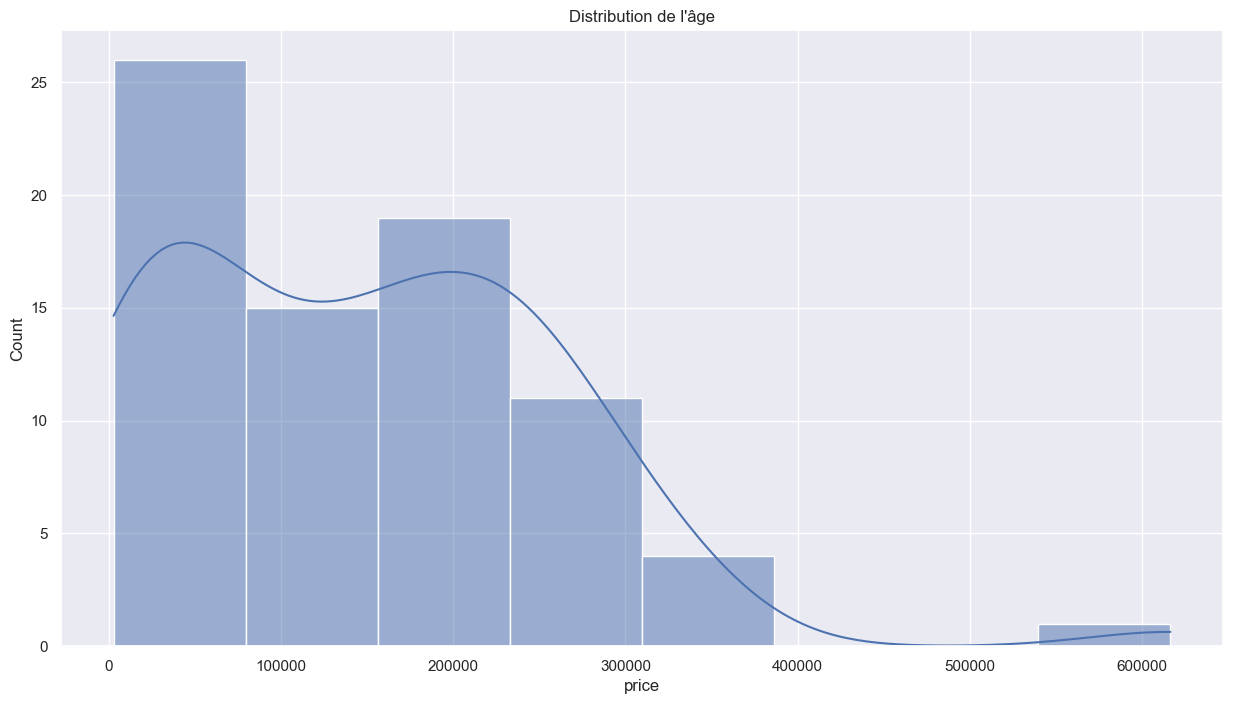

In [195]:
sns.histplot(data=test10, kde=True)
plt.title('Distribution de l\'âge')

Text(0.5, 1.0, "CA en fonction de l'âge")

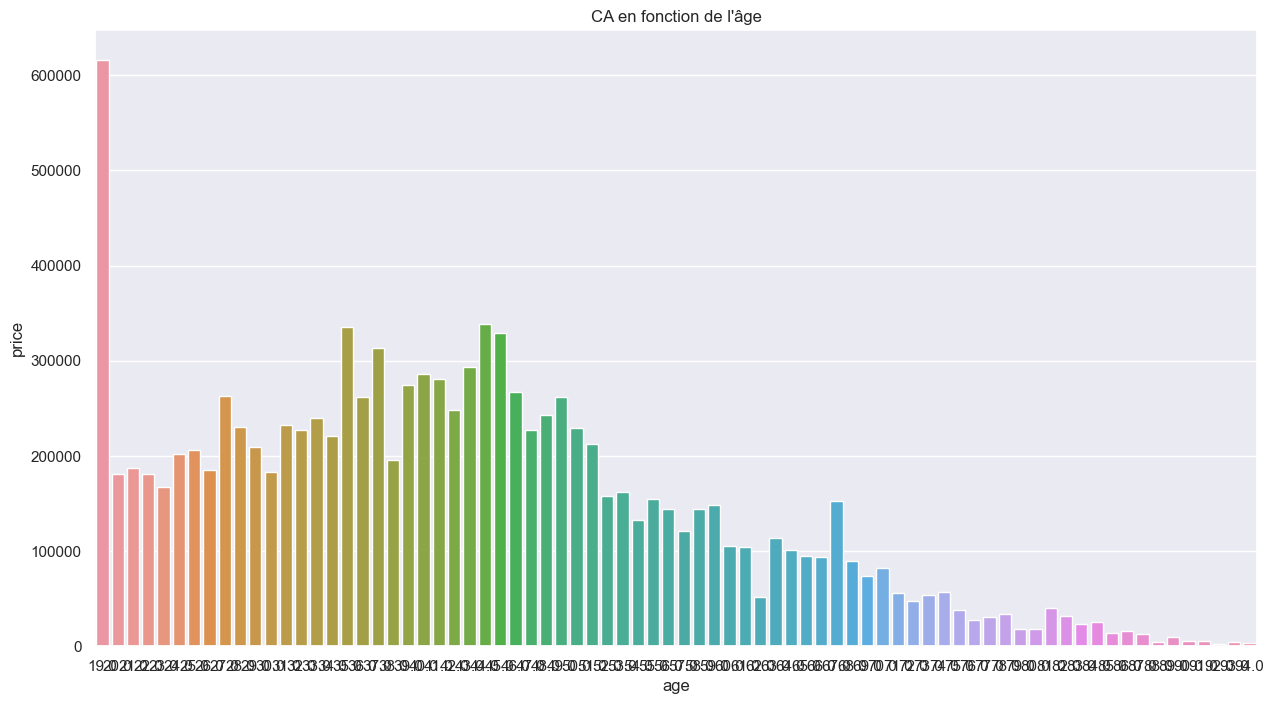

In [196]:
sns.barplot(data=clients_part.groupby('age').sum().reset_index(),x='age',y='price')
plt.title('CA en fonction de l\'âge')



Text(0.5, 1.0, "CA en fonction de l'âge")

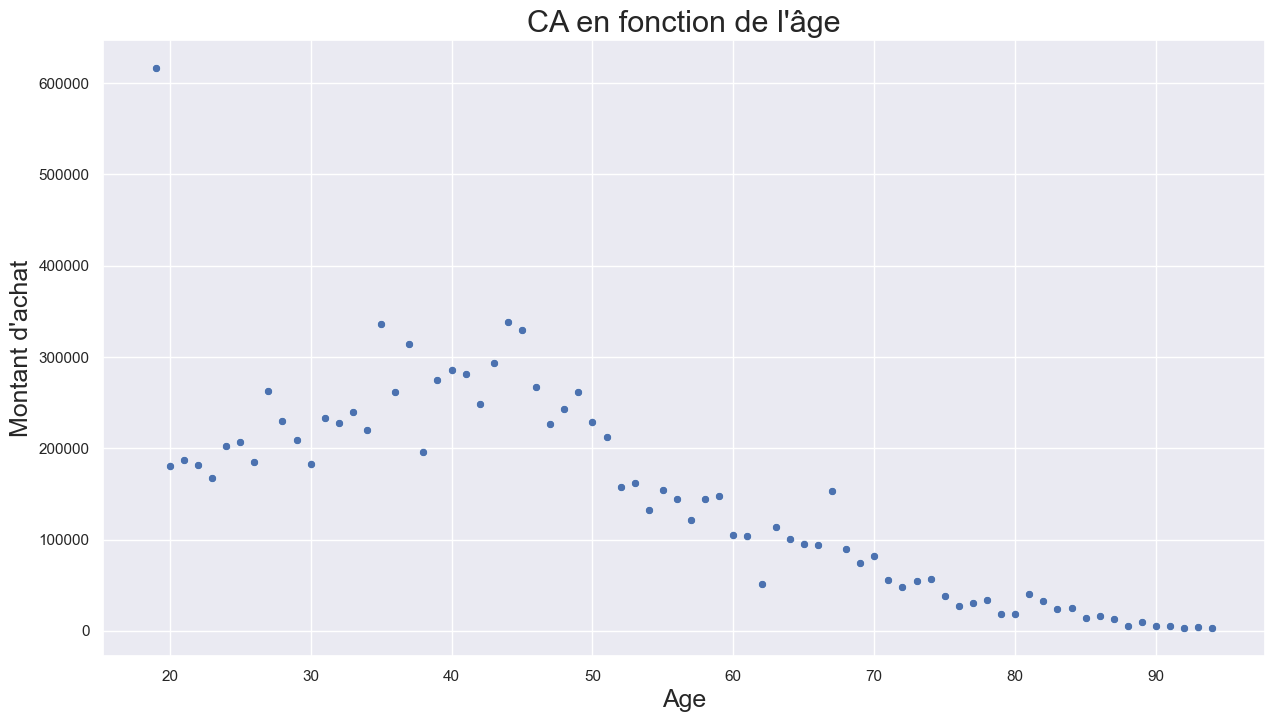

In [197]:
sns.scatterplot(data=clients_part.groupby('age').sum(),x='age',y='price')
plt.ylabel('Montant d\'achat', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.title('CA en fonction de l\'âge', fontsize=22)

Text(0.5, 1.0, "CA en fonction de la tranche d'âge")

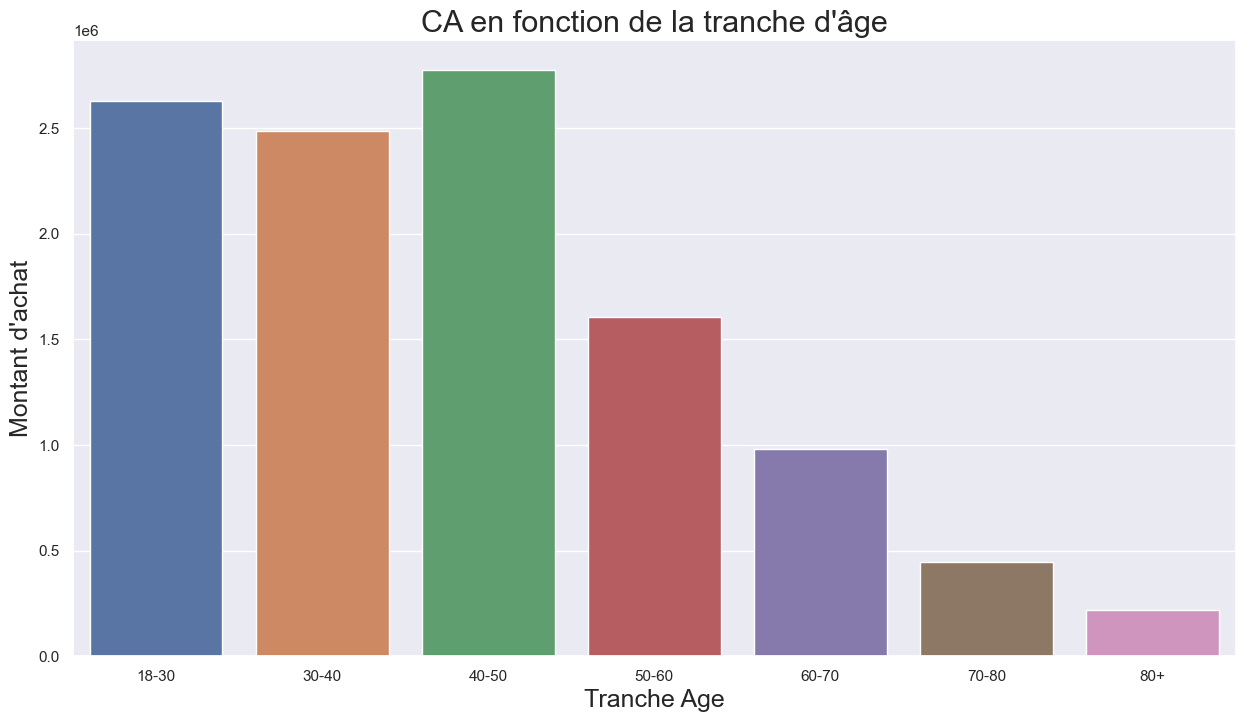

In [198]:
sns.barplot(data=clients_part.groupby('tranche_age').sum().reset_index(), x='tranche_age', y='price')
plt.ylabel('Montant d\'achat', fontsize=18)
plt.xlabel('Tranche Age', fontsize=18)
plt.title('CA en fonction de la tranche d\'âge', fontsize=22)

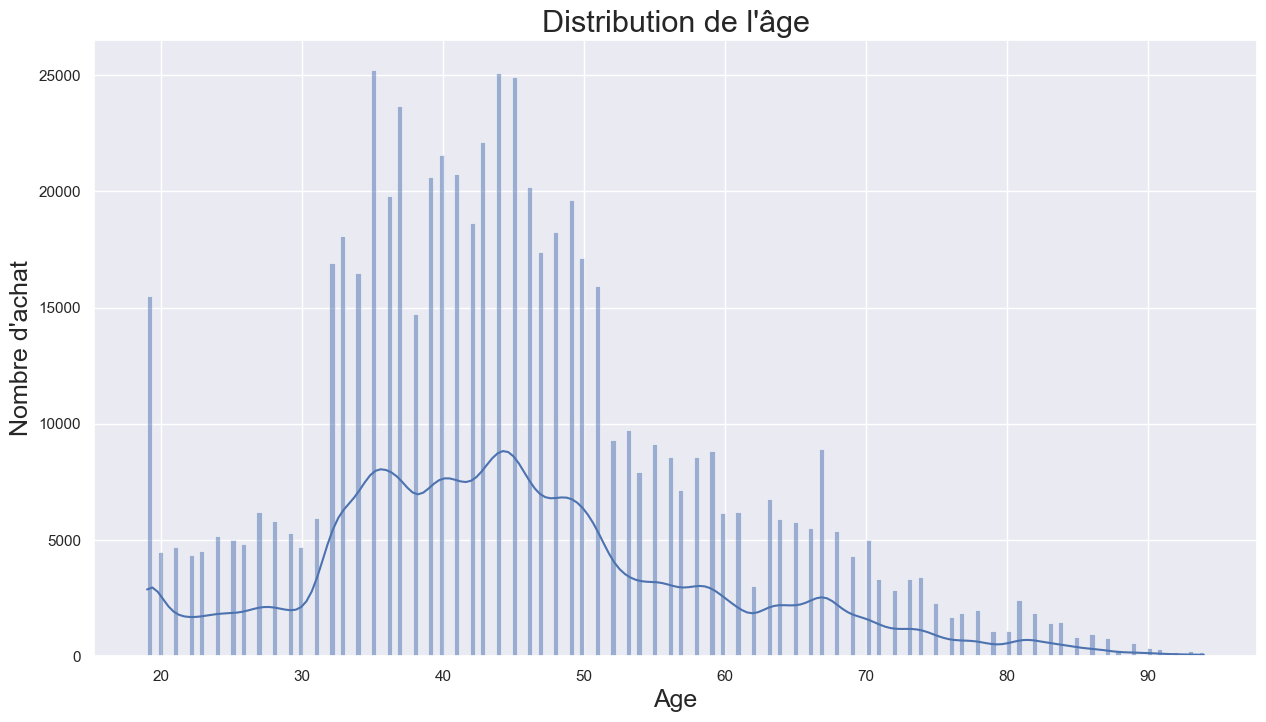

In [199]:
sns.histplot(data=clients_part['age'], kde=True)
plt.ylabel('Nombre d\'achat', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.title('Distribution de l\'âge', fontsize=22)


plt.show()

Vérifions si nos données âge et montant suivent un loi normale en utilisant le test de Kolmogrov-Smirnov (KS)

H0 (nulle) : la distribution est gaussienne.

H1 (alternative) : La distribution est non gaussienne.

Si la p value des test KS est inférieur à 5%, on rejette H0 et on conclue que la distribution est non gaussienne.

In [200]:
from scipy.stats import ks_2samp
ks_2samp(clients_part['age'],list(np.random.normal(np.mean(clients_part['age']), np.std(clients_part['age']), 1000)))

KstestResult(statistic=0.08982833437900906, pvalue=1.858603108372486e-07)

La p value est inférieur à 5%, notre distribution est non paramétric. Nous allons effectuer un test de spearman

In [201]:
age_montant=clients_part.groupby('age').sum().reset_index().iloc[:,:-1].rename(columns = {'price': 'montant_total'}) 
age_montant.sample()

,age,montant_total
63,82.0,32138.54


In [202]:
scipy.stats.spearmanr(age_montant)

SpearmanrResult(correlation=-0.8744497607655503, pvalue=5.956077505475151e-25)

Ce test nous idique qu'il y a une corrélation négative entre age et montant total. La pvalue est inférieur à 5% ce qui nous permet de conclure que cette corrélation est significative.  


In [203]:
Total_achat=clients_part.pivot_table(index='client_id', values='price', aggfunc='sum').reset_index().rename(columns={'price': 'total_achats'})


In [204]:
#Réaliser des test statistiques pour chaque étude + vérifier les conditions

## Lien entre l'âge des clients et la fréquence d’achat

### Calcul fréquence d'achat par clients

Nous allons démarrer par calculer la fréquence d'achat mensuel de chaque clients particuliers. Pour cela nous allons créer un premier df contenant la fréquence d'achat de chaque client, ensuite un second contenant âge et tranche_age par client, pour ensuite les joindre pour avoir un df complet. 

In [205]:
idee=clients_part.groupby(['client_id',pd.Grouper(key='date', freq='1M')]).size().reset_index().rename(columns={0: 'nb_achat_mois_client'})
idee

,client_id,date,nb_achat_mois_client
0,c_1,2021-06-30,1
1,c_1,2021-07-31,4
2,c_1,2021-08-31,1
3,c_1,2021-09-30,2
4,c_1,2021-10-31,5
...,...,...,...
138124,c_999,2022-10-31,1
138125,c_999,2022-11-30,2
138126,c_999,2022-12-31,1
138127,c_999,2023-01-31,5


In [206]:
freq=idee.groupby('client_id').mean().reset_index().rename(columns={'nb_achat_mois_client':'freq_mensuel_achat'})
freq.head()

,client_id,freq_mensuel_achat
0,c_1,2.529412
1,c_10,3.625000
2,c_100,1.600000
3,c_1000,5.727273
4,c_1001,5.150000


In [287]:
age_client=clients_part.loc[:,['client_id', 'age', 'tranche_age']]
age_client.drop_duplicates(keep = 'first', inplace=True)
age_client['tranche_age2'] = '-30'
age_client['tranche_age2'].loc[(age_client['age']>=30) & (age_client['age']<50)] = '30-50'
age_client['tranche_age2'].loc[(age_client['age']>=50)] = '+50'
age_client.head()

C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\1385781805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_client['tranche_age2'].loc[(age_client['age']>=30) & (age_client['age']<50)] = '30-50'
C:\Users\boisj\AppData\Local\Temp\ipykernel_12060\1385781805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_client['tranche_age2'].loc[(age_client['age']>=50)] = '+50'


,client_id,age,tranche_age,tranche_age2
0,c_329,56.0,50-60,+50
63,c_1599,58.0,50-60,+50
25670,c_107,39.0,30-40,30-50
25806,c_4215,43.0,40-50,30-50
25850,c_174,32.0,30-40,30-50


In [288]:
freq_age=pd.merge(freq,age_client, how='left', on='client_id')
#à noter que la jointure ici que le type de jointure importe peu car les données correspondent
freq_age.head()

,client_id,freq_mensuel_achat,age,tranche_age,tranche_age2
0,c_1,2.529412,68.0,60-70,+50
1,c_10,3.625000,67.0,60-70,+50
2,c_100,1.600000,31.0,30-40,30-50
3,c_1000,5.727273,57.0,50-60,+50
4,c_1001,5.150000,41.0,40-50,30-50


In [289]:
freq_age.iloc[:,1:3]

,freq_mensuel_achat,age
0,2.529412,68.0
1,3.625000,67.0
2,1.600000,31.0
3,5.727273,57.0
4,5.150000,41.0
...,...,...
8591,1.750000,68.0
8592,4.173913,53.0
8593,3.105263,29.0
8594,3.666667,22.0


In [210]:
freq_age_mean=freq_age.groupby('age').mean().reset_index()
freq_age_mean

,age,freq_mensuel_achat
0,19.0,2.614783
1,20.0,2.486228
2,21.0,2.492808
3,22.0,2.613421
4,23.0,2.666049
...,...,...
71,90.0,3.166980
72,91.0,2.938950
73,92.0,3.031005
74,93.0,3.221014


### Hypothèses

Nous avons 2 variables quantitatives. Nous allons voir si elles suivent une loi normale.

Nous employons un scatterplot pour présenter la relation entre l'âge et la fréquence puis un barplot pour connaitre la tranche d'âge qui achête le plus.

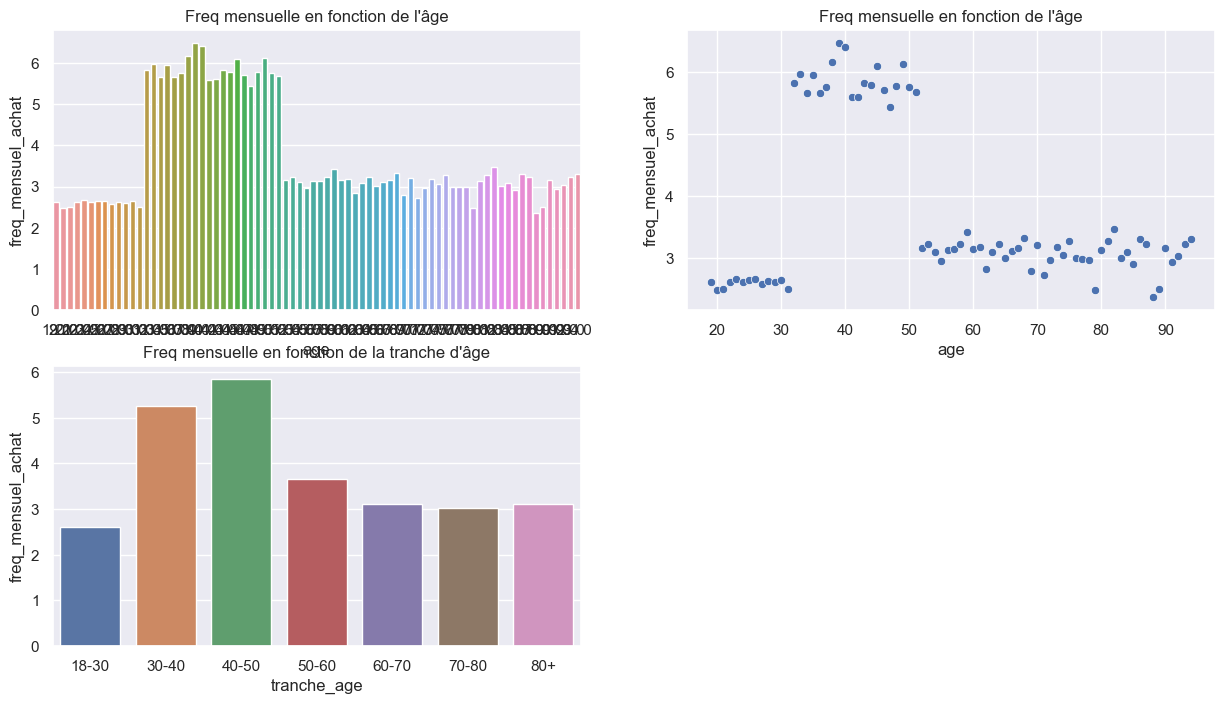

In [211]:
plt.subplot(221)
sns.barplot(data=freq_age.groupby('age').mean().reset_index(),x='age',y='freq_mensuel_achat')
plt.title('Freq mensuelle en fonction de l\'âge')

plt.subplot(222)
sns.scatterplot(data=freq_age.groupby('age').mean().reset_index(),x='age',y='freq_mensuel_achat')
plt.title('Freq mensuelle en fonction de l\'âge')

plt.subplot(223)
sns.barplot(data=freq_age.groupby('tranche_age').mean().reset_index(), x='tranche_age', y='freq_mensuel_achat')
plt.title('Freq mensuelle en fonction de la tranche d\'âge')

plt.show()

Text(0.5, 1.0, "Freq mensuelle en fonction de l'âge")

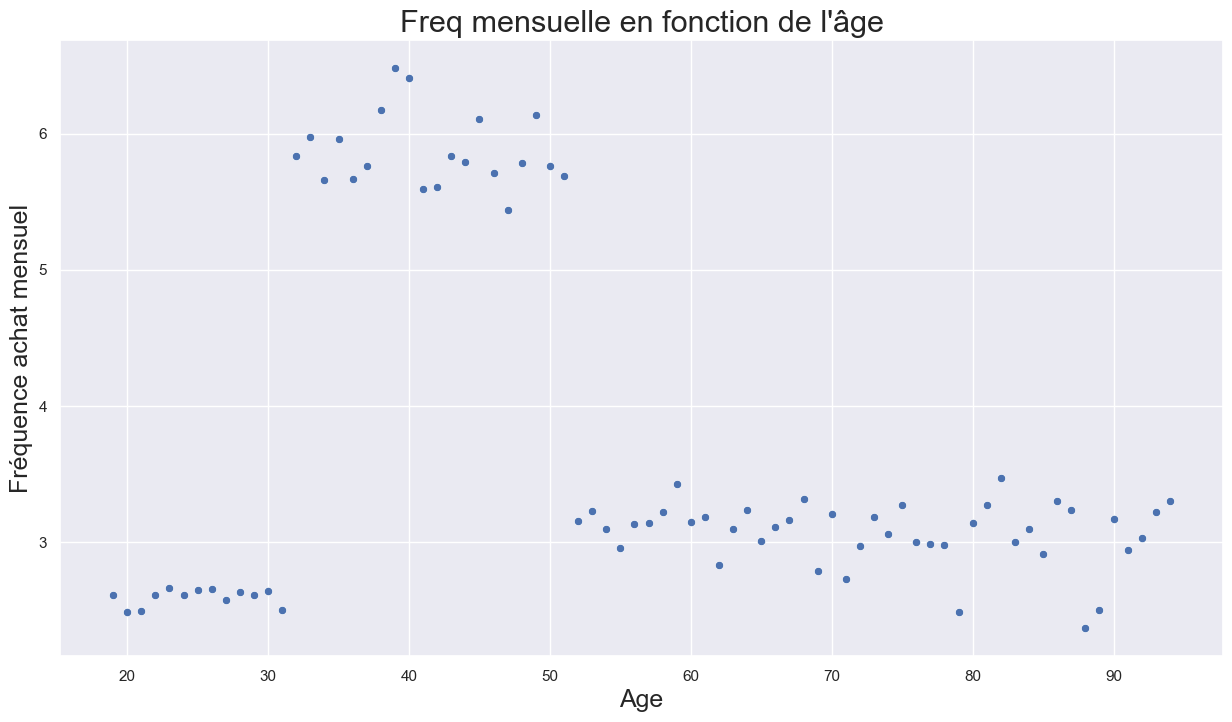

In [212]:
sns.scatterplot(data=freq_age.groupby('age').mean().reset_index(),x='age',y='freq_mensuel_achat')
plt.ylabel('Fréquence achat mensuel', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.title('Freq mensuelle en fonction de l\'âge', fontsize=22)

Ce scatterplot nous permet de distinguer 3 catégories d'âge, les -30, 30-50 et les +50

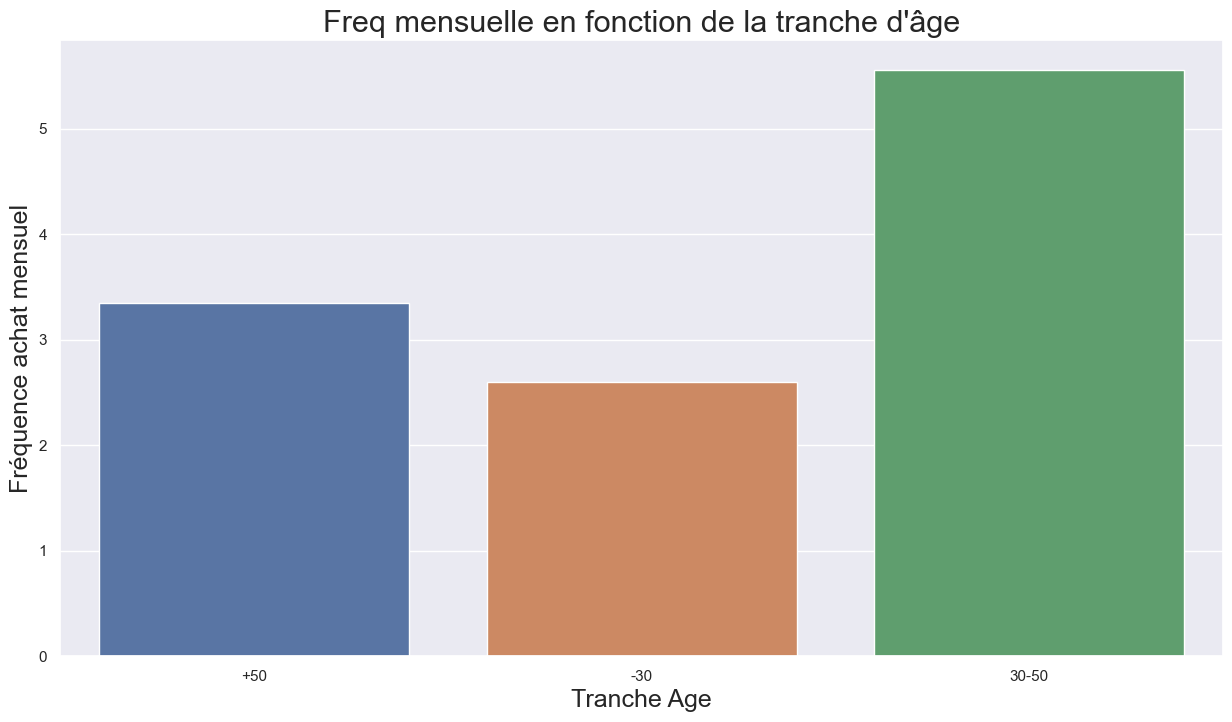

In [298]:
sns.barplot(data=freq_age.groupby('tranche_age2').mean().reset_index(), x='tranche_age2', y='freq_mensuel_achat')
plt.ylabel('Fréquence achat mensuel', fontsize=18)
plt.xlabel('Tranche Age', fontsize=18)
plt.title('Freq mensuelle en fonction de la tranche d\'âge', fontsize=22)
plt.show()

In [300]:
freq_age.groupby('tranche_age2').mean()

,freq_mensuel_achat,age
tranche_age2,,
+50,3.347837,62.720909
-30,2.603034,23.418724
30-50,5.561502,39.697791


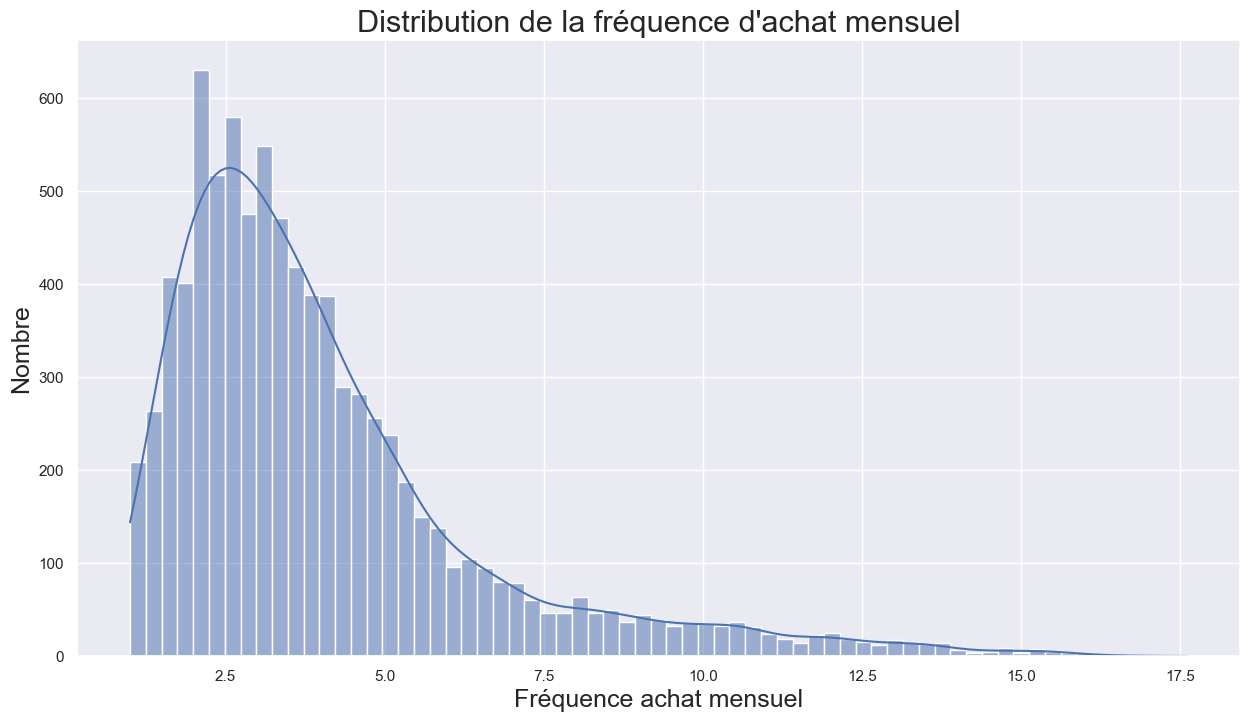

In [302]:
sns.histplot(data=freq_age, x='freq_mensuel_achat', kde='s')
plt.ylabel('Nombre', fontsize=18)
plt.xlabel('Fréquence achat mensuel', fontsize=18)
plt.title('Distribution de la fréquence d\'achat mensuel', fontsize=22)


plt.show()

In [304]:
freq_age

,client_id,freq_mensuel_achat,age,tranche_age,tranche_age2
0,c_1,2.529412,68.0,60-70,+50
1,c_10,3.625000,67.0,60-70,+50
2,c_100,1.600000,31.0,30-40,30-50
3,c_1000,5.727273,57.0,50-60,+50
4,c_1001,5.150000,41.0,40-50,30-50
...,...,...,...,...,...
8591,c_995,1.750000,68.0,60-70,+50
8592,c_996,4.173913,53.0,50-60,+50
8593,c_997,3.105263,29.0,18-30,-30
8594,c_998,3.666667,22.0,18-30,-30


In [ ]:
import patsy
y, X = patsy.dmatrices('age ~ categ', data = clients_part.sample(5000), return_type = 'dataframe')


In [327]:
v, W = patsy.dmatrices('freq_mensuel_achat ~ tranche_age2', data = freq_age.sample(5000), return_type = 'dataframe')


In [328]:
scipy.stats.kruskal(v, W)

KruskalResult(statistic=array([8364.74298869, 7908.19703886, 7689.72927252]), pvalue=array([0., 0., 0.]))

In [314]:
clients_part

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2,type_clients,tranche_age
0,0_1259,s_1,c_329,2021-03-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
1,0_1259,s_275943,c_329,2022-10-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
2,0_1259,s_305291,c_329,2022-12-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
3,0_1259,s_320153,c_329,2023-01-01 00:01:07.843138,11.99,0,both,f,1967.0,56.0,both,particulier,50-60
4,1_397,s_123998,c_329,2021-11-23 18:21:56.361813,18.99,1,both,f,1967.0,56.0,both,particulier,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,2_163,s_259828,c_7739,2022-08-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier,18-30
687530,2_163,s_289331,c_7739,2022-10-28 16:51:07.389515,68.99,2,both,m,1997.0,26.0,both,particulier,18-30
687531,1_64,s_136405,c_712,2021-12-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier,50-60
687532,1_64,s_284469,c_712,2022-10-18 20:54:25.725059,19.81,1,both,f,1967.0,56.0,both,particulier,50-60


In [313]:
groupA=freq_age.loc[freq_age['tranche_age2']=='-30'].iloc[:,2]
groupB=freq_age.loc[freq_age['tranche_age2']=='30-50'].iloc[:,2]
groupC=freq_age.loc[freq_age['tranche_age2']=='+50'].iloc[:,2]




KruskalResult(statistic=7501.754486078573, pvalue=0.0)

Text(0.5, 1.0, "Freq mensuelle en fonction de la tranche d'âge")

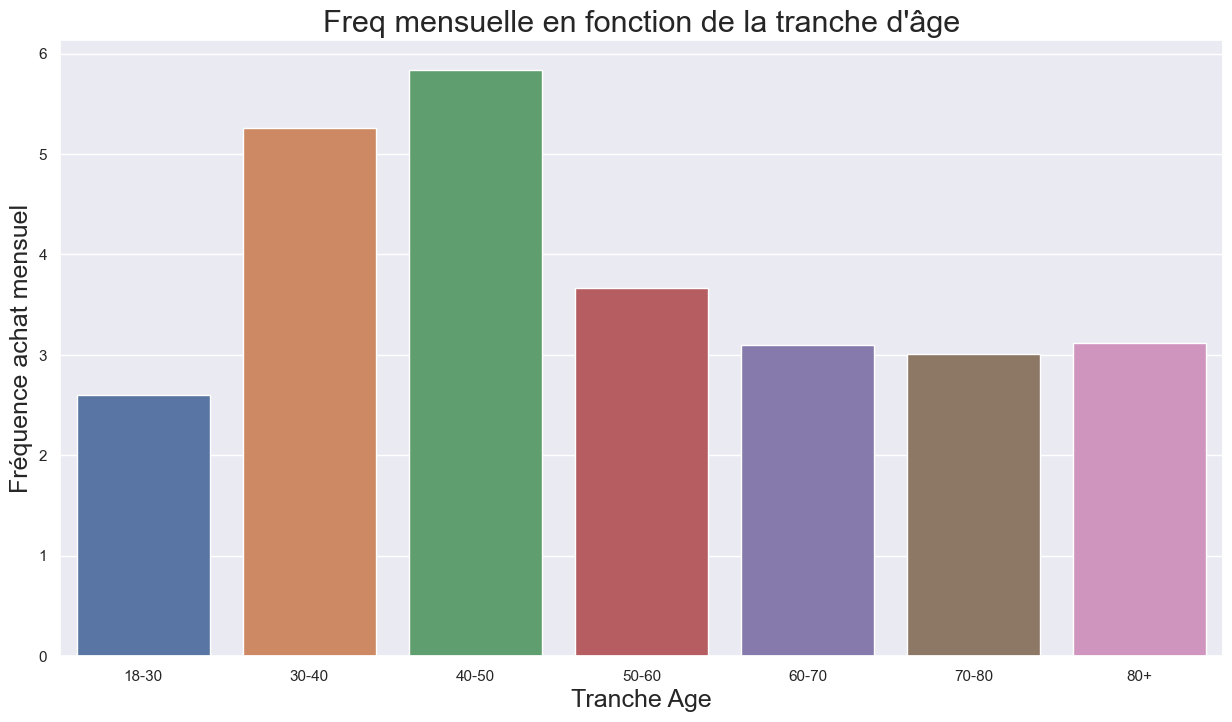

In [213]:
sns.barplot(data=freq_age.groupby('tranche_age').mean().reset_index(), x='tranche_age', y='freq_mensuel_achat')
plt.ylabel('Fréquence achat mensuel', fontsize=18)
plt.xlabel('Tranche Age', fontsize=18)
plt.title('Freq mensuelle en fonction de la tranche d\'âge', fontsize=22)
plt.show()

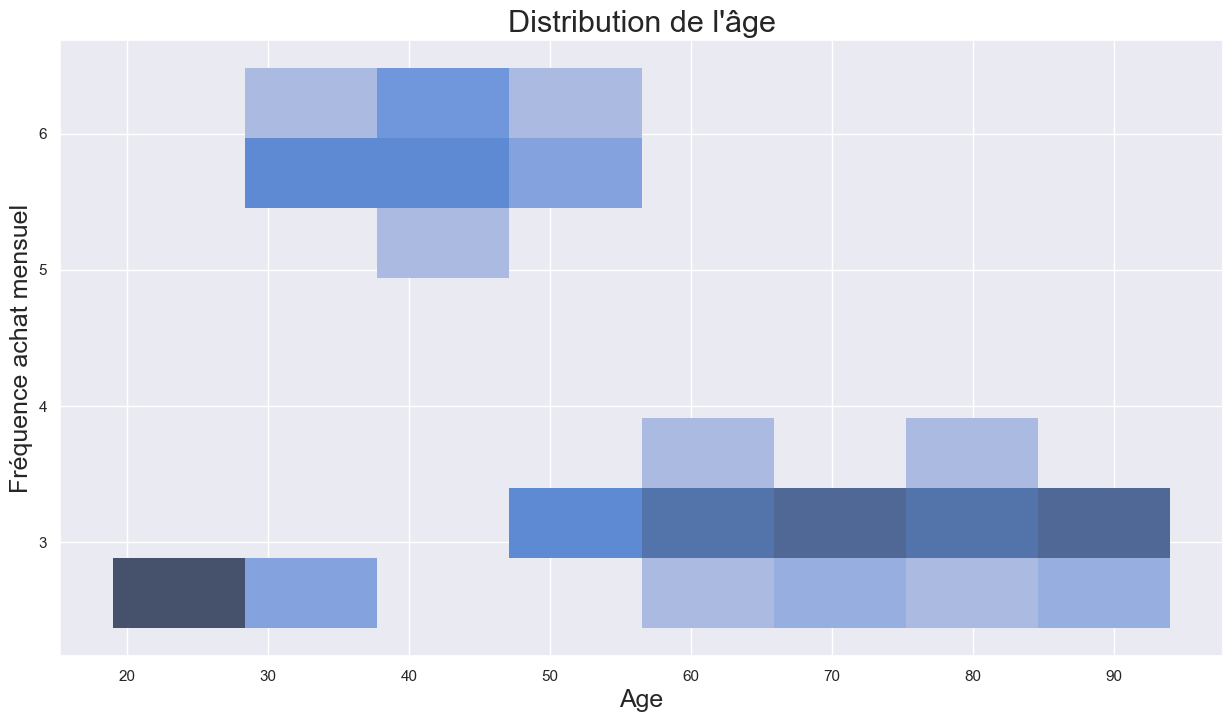

In [214]:
sns.histplot(data=freq_age_mean, x='age', y='freq_mensuel_achat')
plt.ylabel('Fréquence achat mensuel', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.title('Distribution de l\'âge', fontsize=22)


plt.show()

### Boxplot lien freq et tranche d'âge

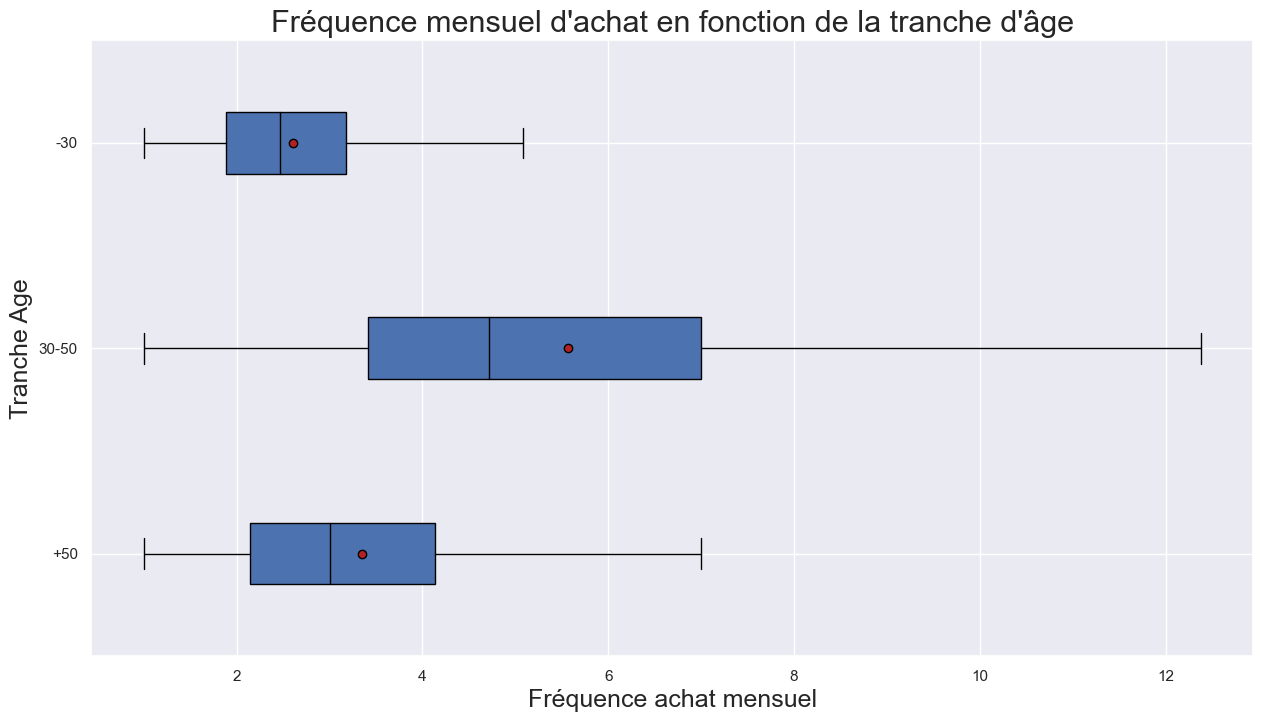

In [303]:
O = 'tranche_age2' # qualitative
Y = 'freq_mensuel_achat' # quantitative

modalites = freq_age[O].unique()
groupes = []
for m in modalites:
    groupes.append(freq_age[freq_age[O]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Fréquence achat mensuel', fontsize=18)
plt.ylabel('Tranche Age', fontsize=18)
plt.title('Fréquence mensuel d\'achat en fonction de la tranche d\'âge', fontsize=22)

plt.show()

### Test de normalité et statistiques

Vérifions si nos données âge et montant suivent un loi normale en utilisant le test de Kolmogrov-Smirnov (KS)

H0 (nulle) : la distribution est gaussienne.

H1 (alternative) : La distribution est non gaussienne.

Si la p value des test KS est inférieur à 5%, on rejette H0 et on conclue que la distribution est non gaussienne.

In [216]:
ks_2samp(freq_age['freq_mensuel_achat'],list(np.random.normal(np.mean(freq_age['freq_mensuel_achat']), np.std(freq_age['freq_mensuel_achat']), 1000)))

KstestResult(statistic=0.14092182410423454, pvalue=5.570840980744235e-16)

La p value est inférieur à 5%, notre distribution est non paramétric. Nous allons effectuer un test de spearman

In [217]:
scipy.stats.spearmanr(freq_age.iloc[:,1:3])


SpearmanrResult(correlation=0.04771254599544319, pvalue=9.620693333971185e-06)

Ce test nous idique qu'il n'y a pas de corrélation entre age et freq d'achat.

## Lien entre l'âge des clients et la taille du panier moyen

In [218]:
montant_panier=clients_part.groupby(['session_id', 'tranche_age']).mean().reset_index().rename(columns={'price': 'panier_moyen'})
montant_panier.head()


,session_id,tranche_age,panier_moyen,birth,age
0,s_1,50-60,11.990,1967.0,56.0
1,s_10,50-60,26.990,1970.0,53.0
2,s_100,40-50,16.860,1978.0,45.0
3,s_1000,30-40,9.805,1989.0,34.0
4,s_10000,30-40,13.830,1989.0,34.0


In [219]:
age_panier_moyen=montant_panier.groupby('age').mean().reset_index().iloc[:,0:2]
age_panier_moyen

,age,panier_moyen
0,19.0,46.952622
1,20.0,46.493117
2,21.0,46.744052
3,22.0,48.803320
4,23.0,44.448737
...,...,...
71,90.0,15.970205
72,91.0,15.858612
73,92.0,16.559279
74,93.0,17.533911


### Boxplot

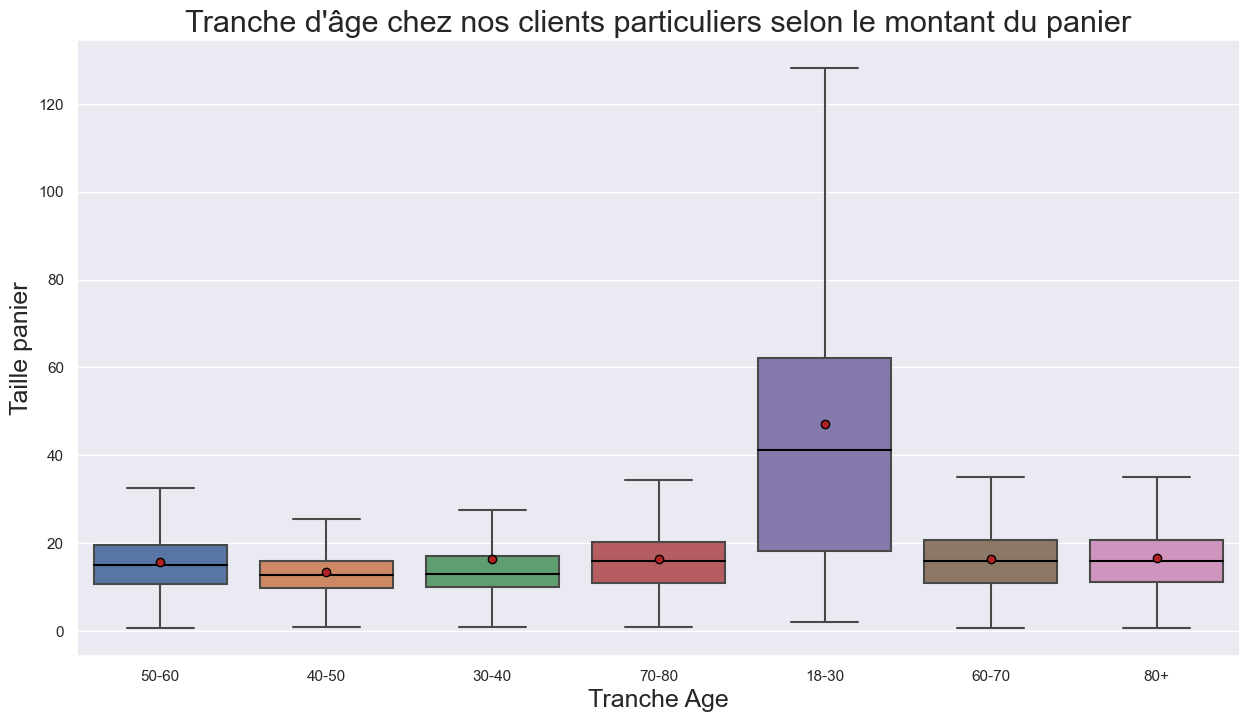

In [220]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(data=montant_panier, x='tranche_age', y='panier_moyen', showfliers=False, medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.xlabel('Tranche Age', fontsize=18)
plt.ylabel('Taille panier', fontsize=18)
plt.title('Tranche d\'âge chez nos clients particuliers selon le montant du panier', fontsize=22)

plt.show()

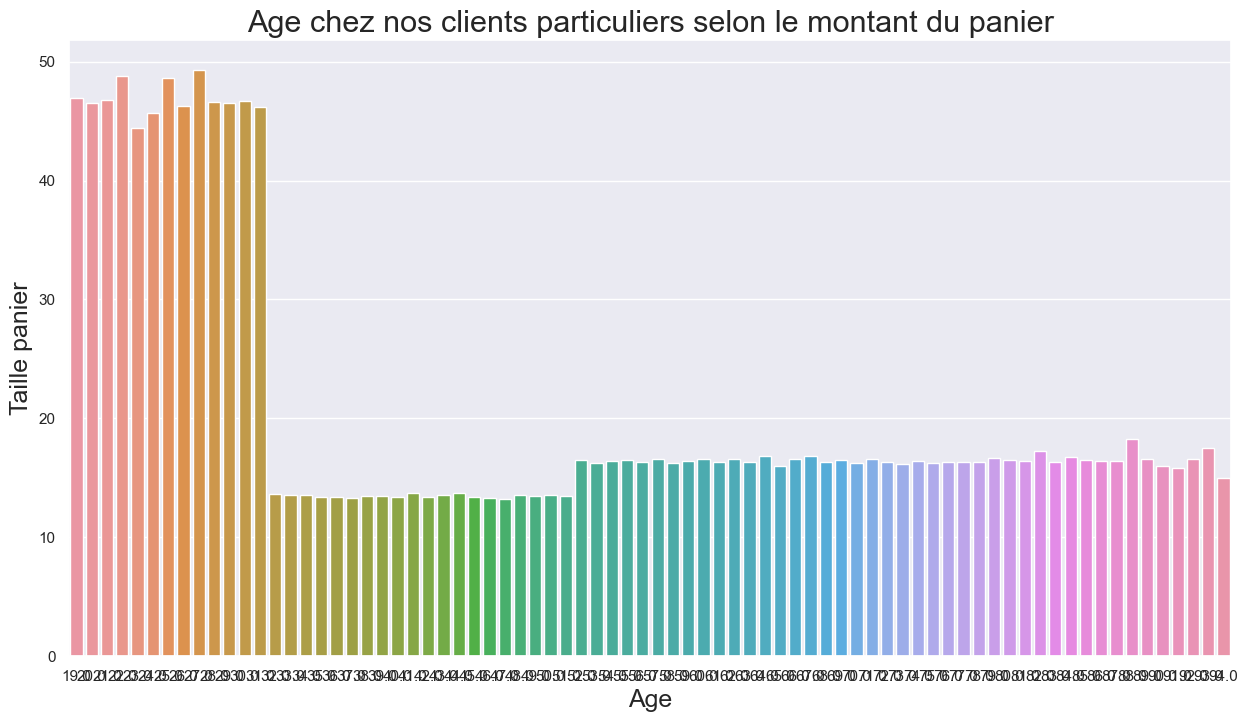

In [233]:
sns.barplot(data=age_panier_moyen, x='age', y='panier_moyen')
plt.title('Montant moyen du panier en fonction de l\'âge')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Taille panier', fontsize=18)
plt.title('Age chez nos clients particuliers selon le montant du panier', fontsize=22)
plt.show()

In [222]:
#Faire un constat sur le la proportion des clients qui ont 18 ans. Il y en a bcp plus que les autres, elle semble anormale
#Bien rappeler que nous ne traitons pas les gros clients

### Test de normalité et statistiques

Vérifions si nos données âge et taille du panier suivent un loi normale en utilisant le test de Kolmogrov-Smirnov (KS)

H0 (nulle) : la distribution est gaussienne.

H1 (alternative) : La distribution est non gaussienne.

Si la p value des test KS est inférieur à 5%, on rejette H0 et on conclue que la distribution est non gaussienne.

In [223]:
ks_2samp(age_panier_moyen['panier_moyen'],list(np.random.normal(np.mean(age_panier_moyen['panier_moyen']), np.std(age_panier_moyen['panier_moyen']), 1000)))

KstestResult(statistic=0.40978947368421054, pvalue=3.2453535844080624e-11)

La p value est inférieur à 5%, notre distribution est non paramétric. Nous allons effectuer un test de spearman

In [224]:
scipy.stats.spearmanr(age_panier_moyen)


SpearmanrResult(correlation=-0.05429938482570062, pvalue=0.641308758318768)

Ce test nous idique qu'il y a une corrélation négative. Cependant, puisque la valeur p de la corrélation n'est pas inférieure à 0,05, la corrélation n'est pas statistiquement significative.

## Lien entre l'âge des clients et la catégorie des livres achetés

Pour vérifier si une corrélation existe entre une variable quali et quanti existe, il est nécessaire de s'intéresser à la variance. Nous allons d'abord projeter la moyenne des âges dans chaque catégorie.

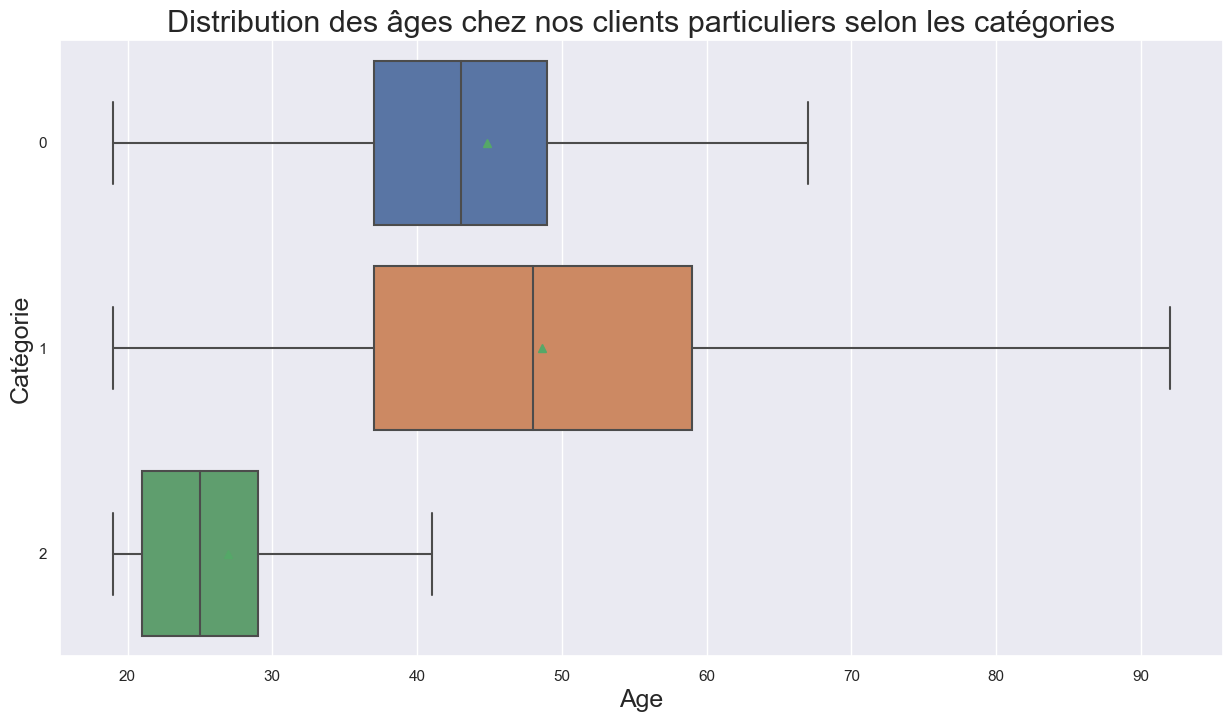

In [225]:
sns.boxplot(data=clients_part, x='age', y='categ', showfliers=False, showmeans=True)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Catégorie', fontsize=18)
plt.title('Distribution des âges chez nos clients particuliers selon les catégories', fontsize=22)

plt.show()

Les catégories 0 et 1 ont des moyennes proches : 

In [226]:
clients_part.groupby('categ').mean()['age']

categ
0    44.794563
1    48.650035
2    26.965508
Name: age, dtype: float64

### Tableau de contingence

Nous allons réaliser un tableau de contingence puis un test anova et voir si celui-ci est utile.

Nous pouvons commencer par afficher le tableau de contingence ci-dessous : 

In [333]:
X = 'tranche_age'
Y = 'categ'

cont = clients_part[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
tranche_age,,,,
18-30,14408,25741,25760,65909
30-40,119972,41628,4696,166296
40-50,156851,50901,758,208510
50-60,54250,47232,735,102217
60-70,24801,32685,550,58036
70-80,11541,15065,219,26825
80+,5458,7353,130,12941
Total,387281,220605,32848,640734


### Test Anova

Nous pouvons essayer de réaliser un test ANOVA pour vérifier les distance entre les 2 moyennes. Pour cela nous devons utiliser des échantillons de notre distribution.

In [228]:
import patsy
y, X = patsy.dmatrices('age ~ categ', data = clients_part.sample(5000), return_type = 'dataframe')

import statsmodels.api
#Nous définissons d'abord le modèle
model = statsmodels.formula.api.ols('age ~ categ', data = clients_part.sample(5000))
result = model.fit()

In [229]:
#Nous réalisons la table ANOVA

table_anova = statsmodels.api.stats.anova_lm(result)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
categ,2.0,99763.054746,49881.527373,287.417722,7.056720e-119
Residual,4997.0,867232.510054,173.550632,NaN,NaN


La P value est proche de zero. C'est à dire qu'il ne semble pas y avoir de corrélation. Néanmoins il faut d'abord vérifier avec les conditions suivantes :  
1. Les résidus suivent une distribution normale (supposée ou vérifiée)
2. Au moins 20 individus dans le dispositif, ou normalité des résidus supposée ou vérifiée

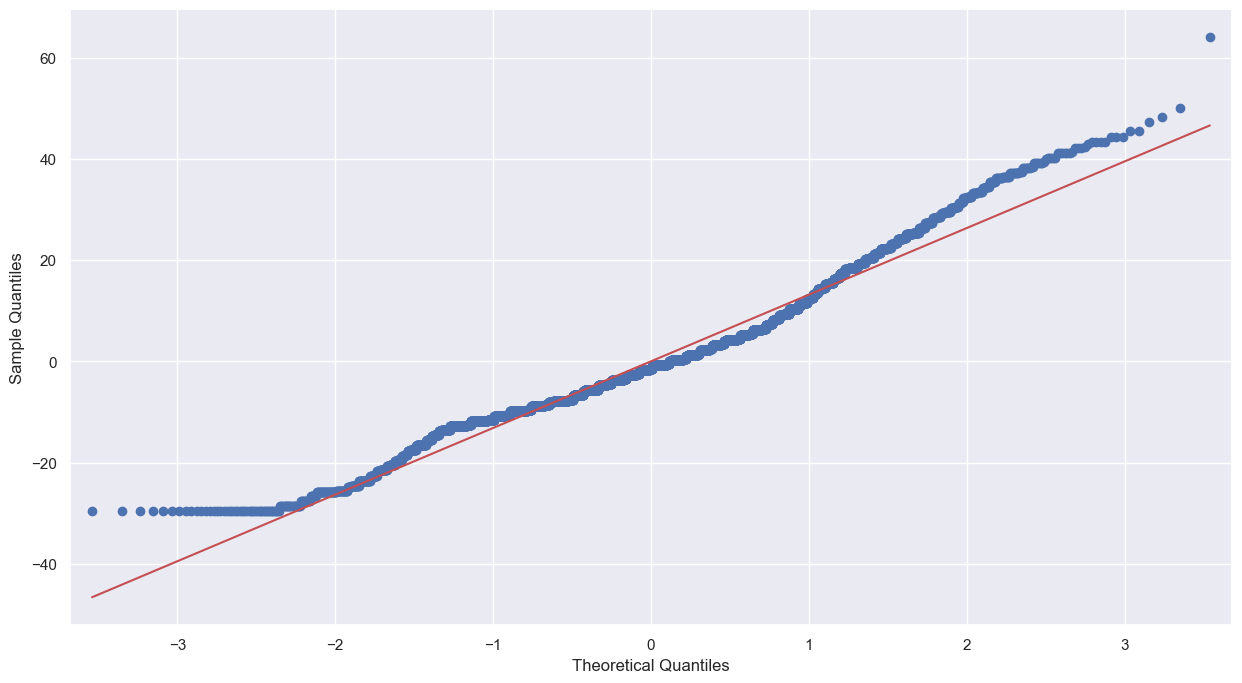

ShapiroResult(statistic=0.9698436856269836, pvalue=3.550906063495027e-31)

In [230]:
from statsmodels.graphics.gofplots import qqplot

qqplot(result.resid, line='s')

plt.show()
scipy.stats.shapiro(result.resid)

La P value est inférieure à 5%. ce qui nous conduit à dire que la distribution des résidus n'est pas normale

On peut considérer nos données comme non paramétrique et utiliser un test de Kruskal-Wallis

In [231]:
scipy.stats.kruskal(y,X)

KruskalResult(statistic=array([8571.48327121, 7816.11057647, 8389.0838424 ]), pvalue=array([0., 0., 0.]))

Ce test nous confirme l'absence de corrélation entre l'âge et la catégorie. Ce que nous pouvons également voir avec une heatmap entre tranches d'âges et catégorie

### Heatmap des tranches d'âge

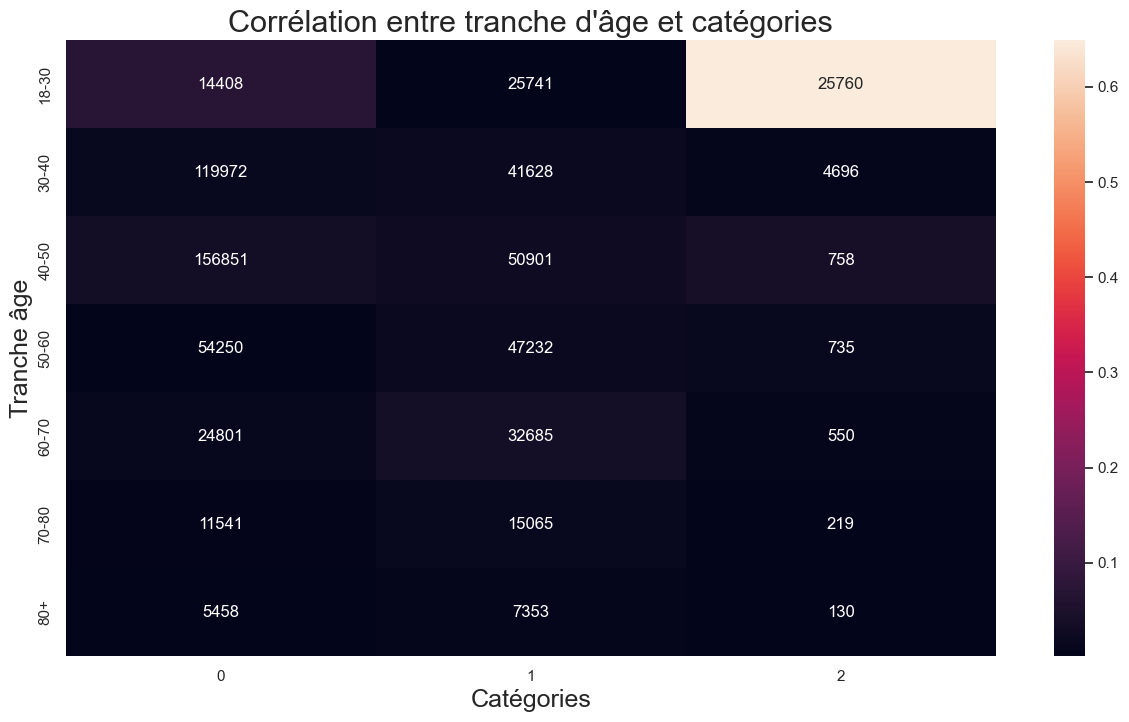

In [232]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(clients_part)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.xlabel('Catégories', fontsize=18)
plt.ylabel('Tranche âge', fontsize=18)
plt.title('Corrélation entre tranche d\'âge et catégories', fontsize=22)
plt.show()

A travers cette heatmap, on peut analyser qu'il y a peu de corrélations entre l'âge et la catégorie des produits achetés hormis pour la tranche d'âge des 18-30 ans qui est la principale à acheter des livres de catégories 2

In [336]:
clients_part.sample()

,id_prod,session_id,client_id,date,price,categ,_merge,sex,birth,age,merge2,type_clients,tranche_age
164137,0_832,s_277745,c_6358,2022-10-04 16:38:57.589683,10.85,0,both,m,1976.0,47.0,both,particulier,40-50


In [346]:
TEST23=clients_part.groupby(['tranche_age','categ']).count().reset_index().iloc[:,0:3]
TEST23.pivot_table(index='categ',columns='tranche_age',margins=True,margins_name="Total")

id_prod                                                     \
tranche_age         18-30   30-40          40-50         50-60         60-70   
categ                                                                          
0            14408.000000  119972  156851.000000  54250.000000  24801.000000   
1            25741.000000   41628   50901.000000  47232.000000  32685.000000   
2            25760.000000    4696     758.000000    735.000000    550.000000   
Total        21969.666667   55432   69503.333333  34072.333333  19345.333333   

                                                      
tranche_age         70-80          80+         Total  
categ                                                 
0            11541.000000  5458.000000  55325.857143  
1            15065.000000  7353.000000  31515.000000  
2              219.000000   130.000000   4692.571429  
Total         8941.666667  4313.666667  30511.142857

In [361]:
TEST24=clients_part.pivot_table(index='categ',columns='tranche_age',aggfunc=len, margins=True,margins_name="Total").reset_index().iloc[0:3,0:8].rename(columns={'_merge':'tranche_age'})
TEST24

categ tranche_age                                           
tranche_age             18-30   30-40   40-50  50-60  60-70  70-80   80+
0               0       14408  119972  156851  54250  24801  11541  5458
1               1       25741   41628   50901  47232  32685  15065  7353
2               2       25760    4696     758    735    550    219   130